In [1]:
import pandas as pd
import ast

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from darts import TimeSeries
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from joblib import dump, load
import matplotlib.pyplot as plt
import cv2

# Prediction for unscaled target data

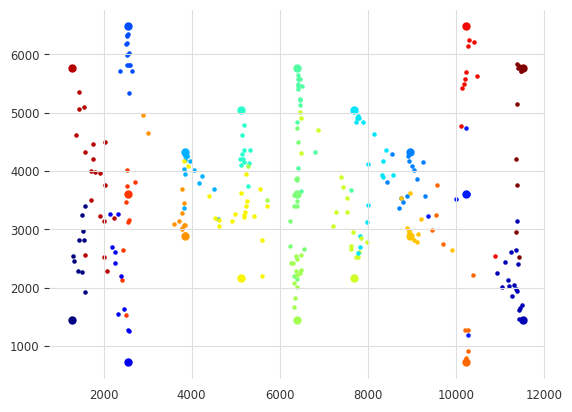

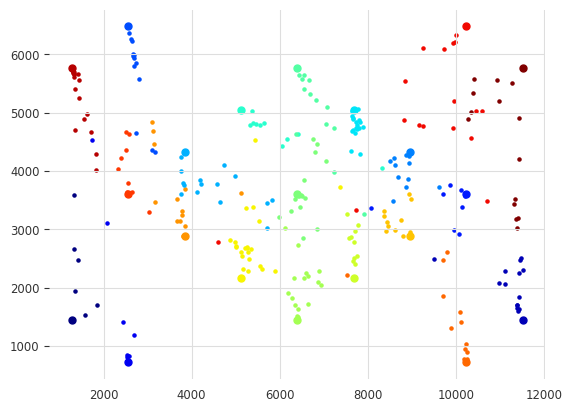

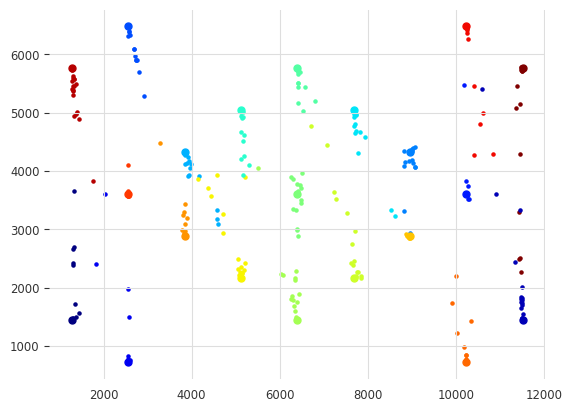

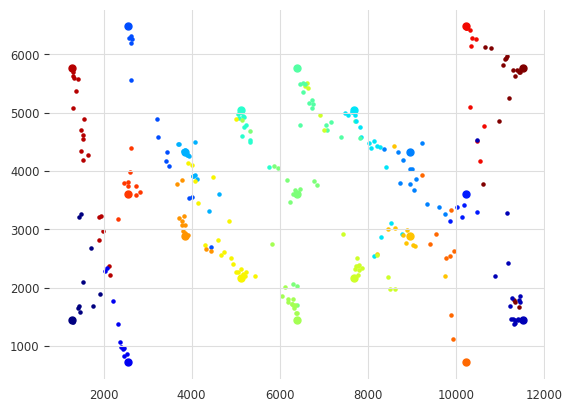

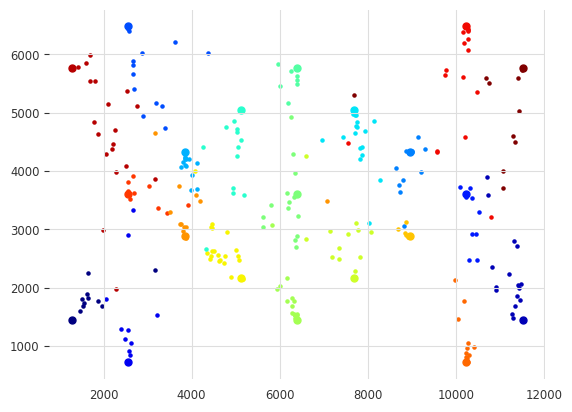

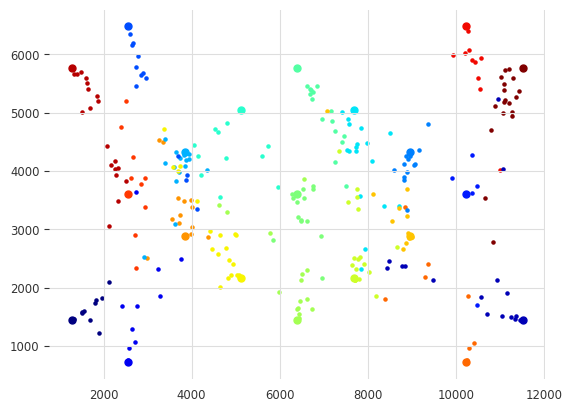

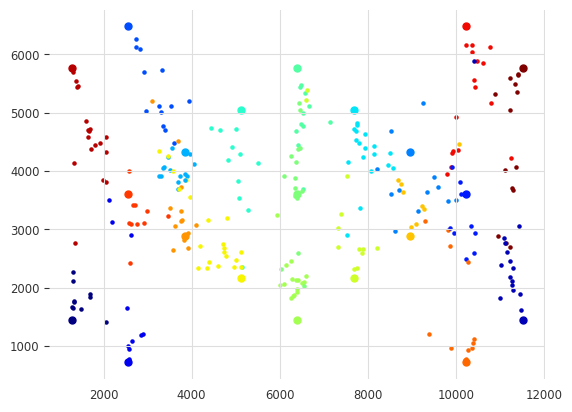

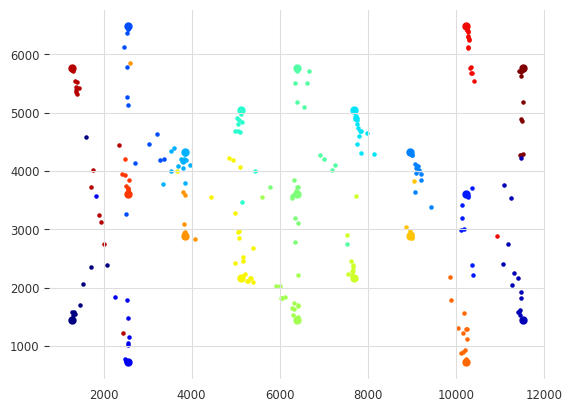

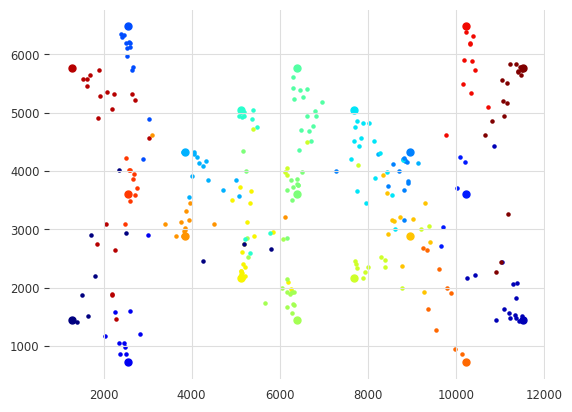

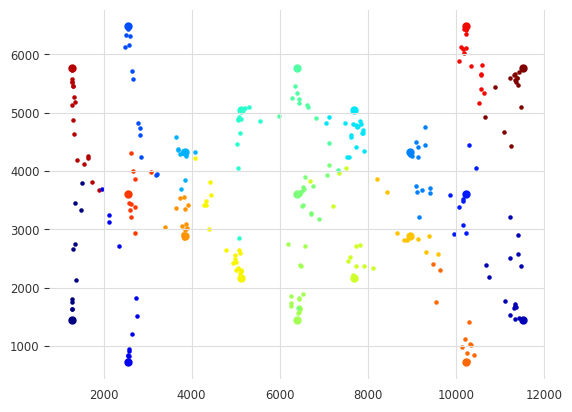

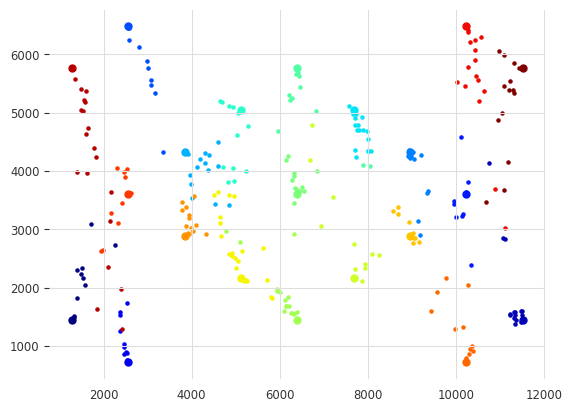

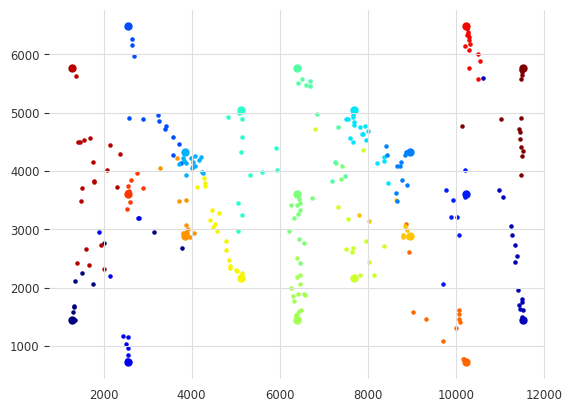

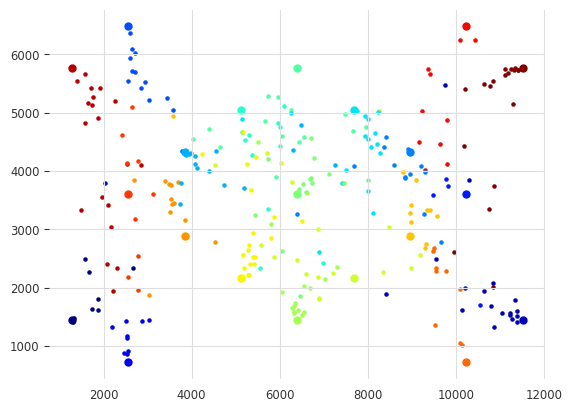

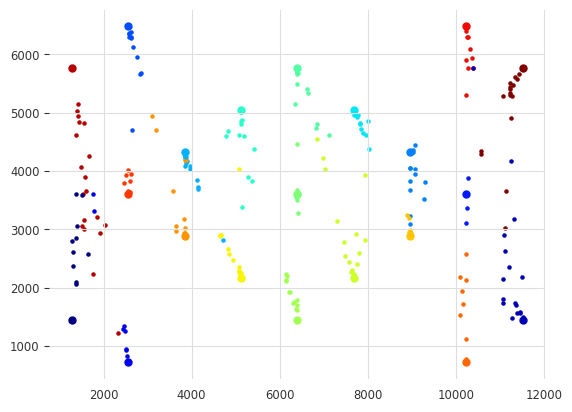

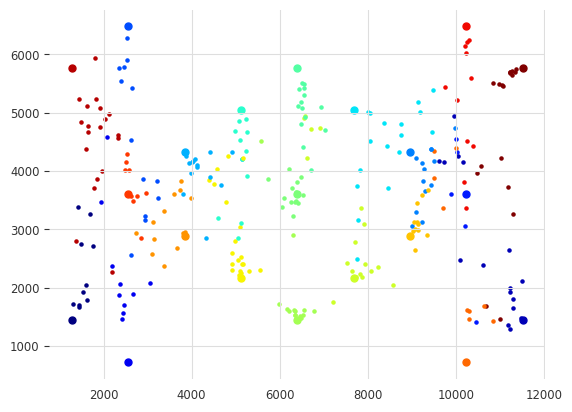

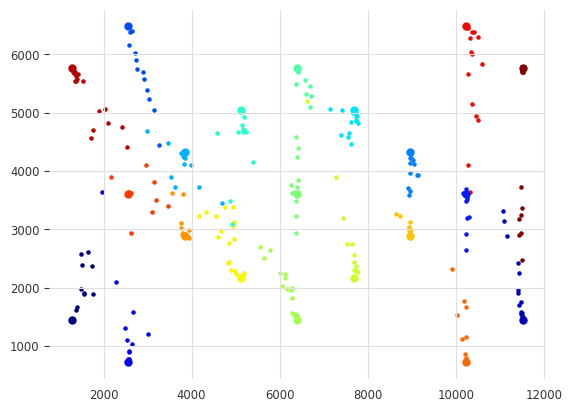

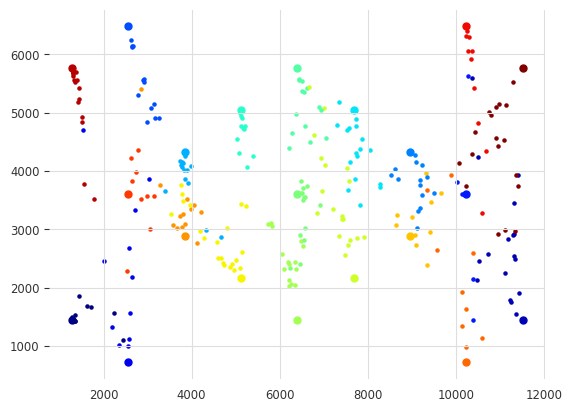

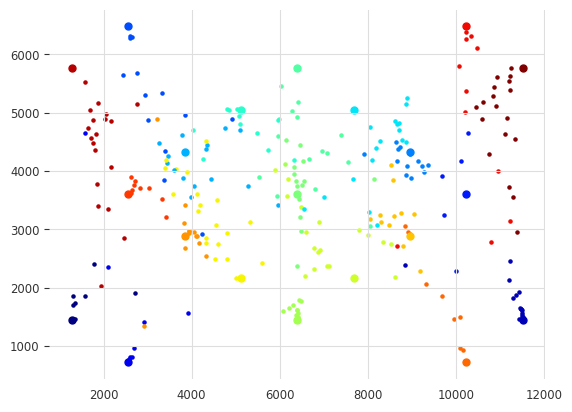

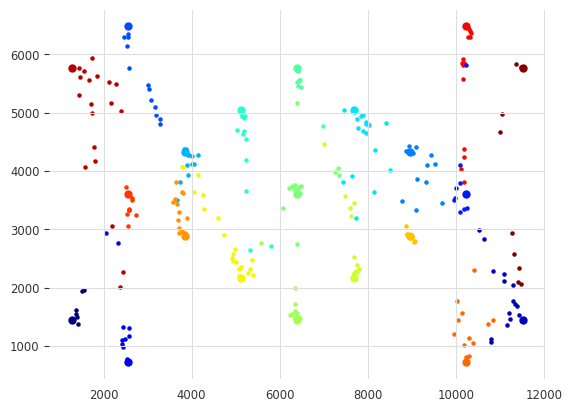

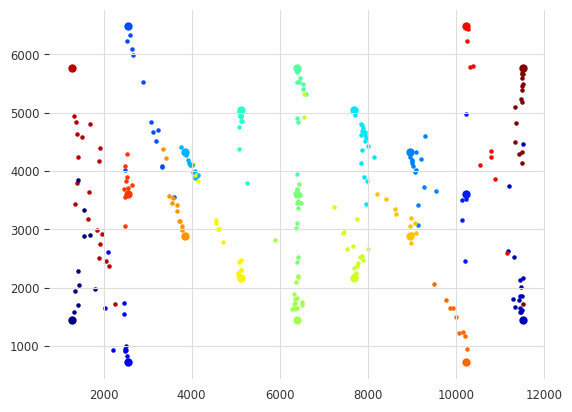

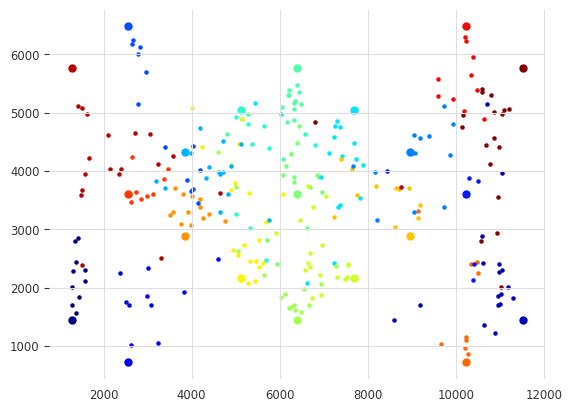

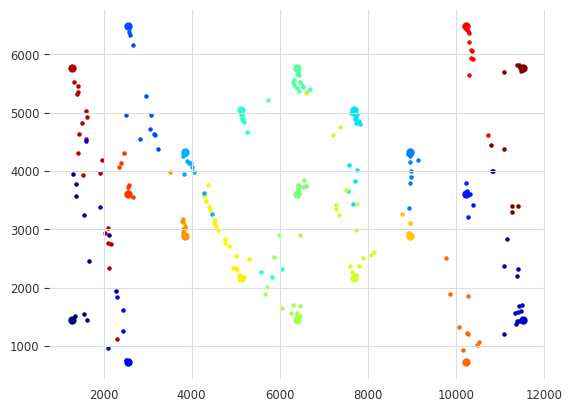

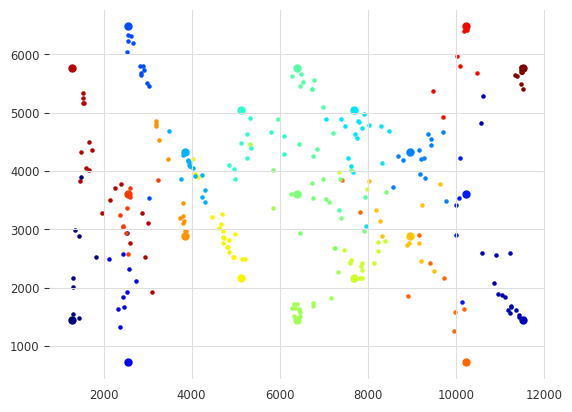

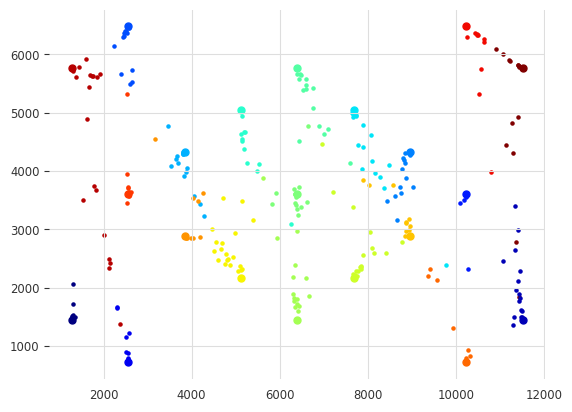

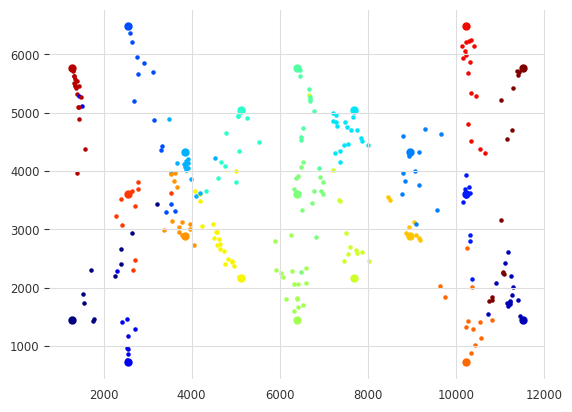

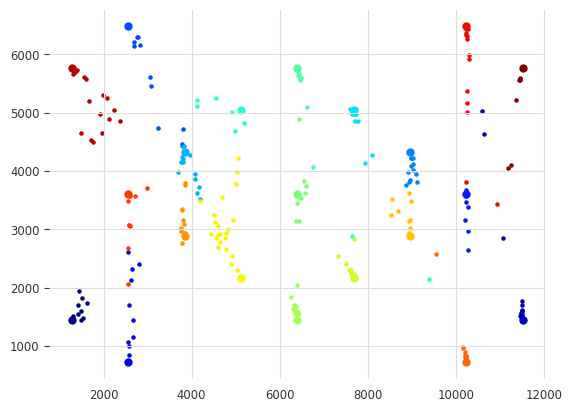

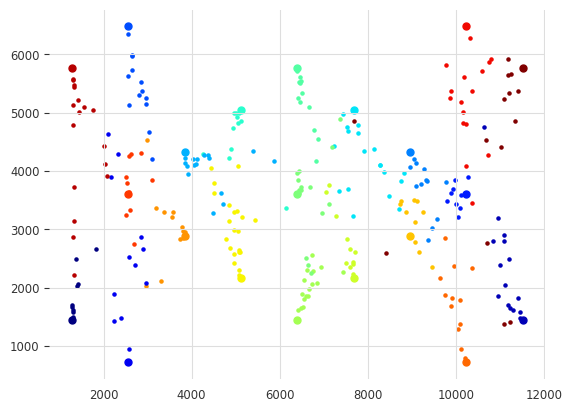

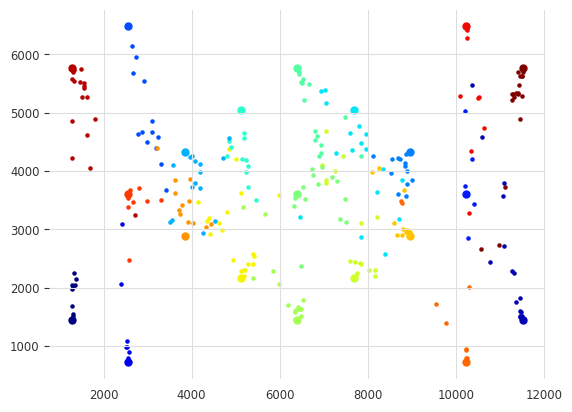

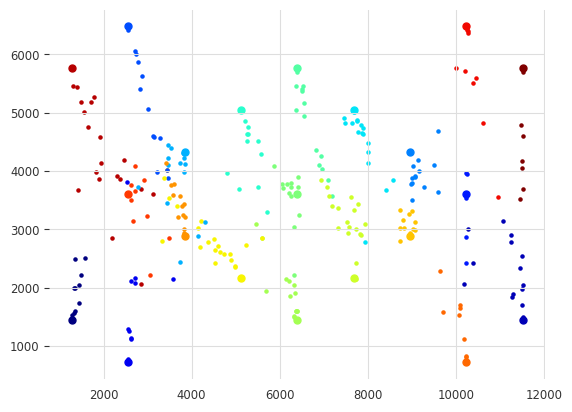

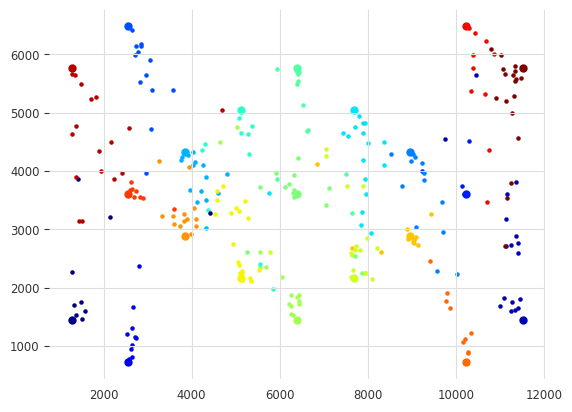

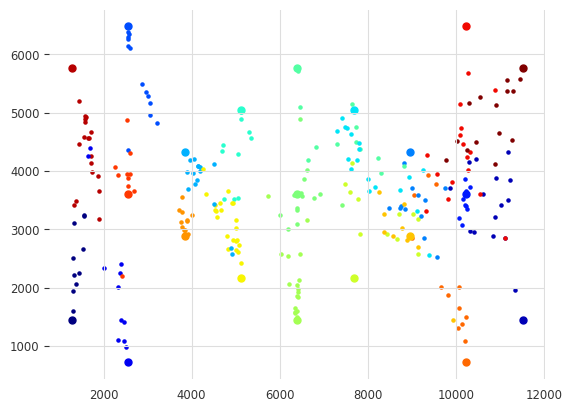

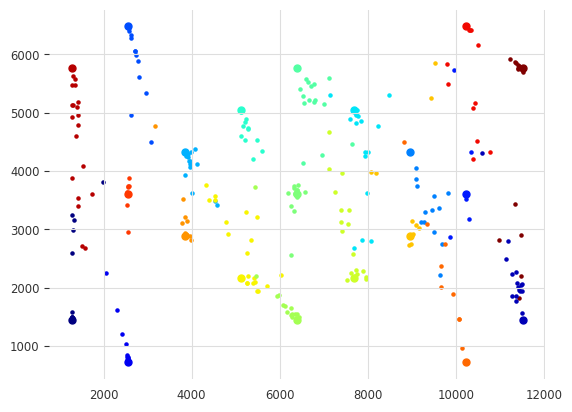

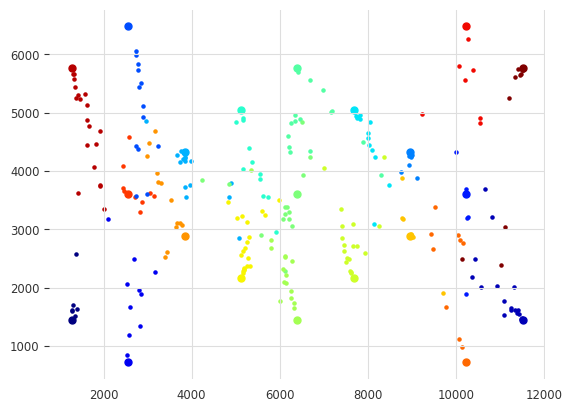

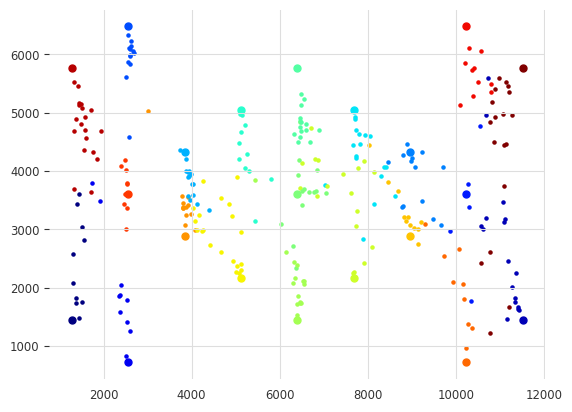

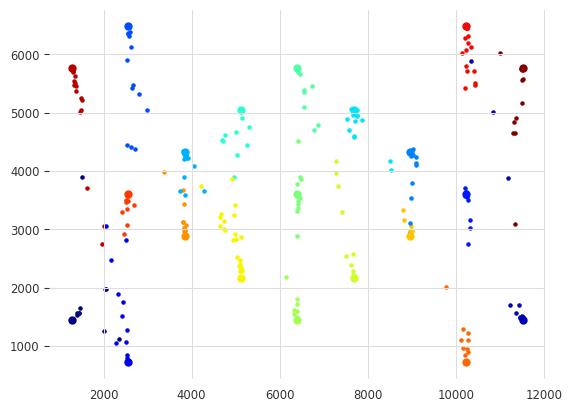

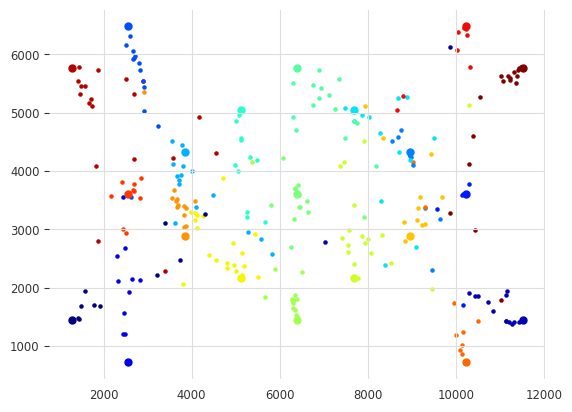

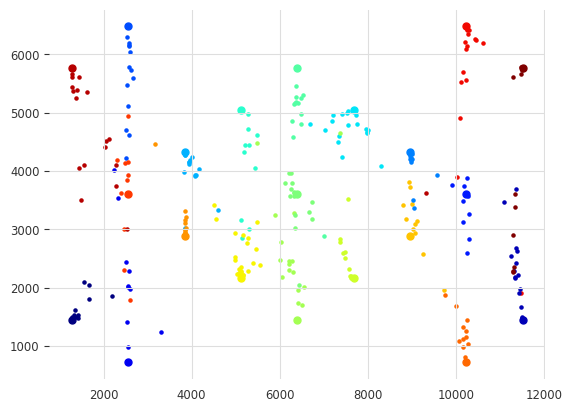

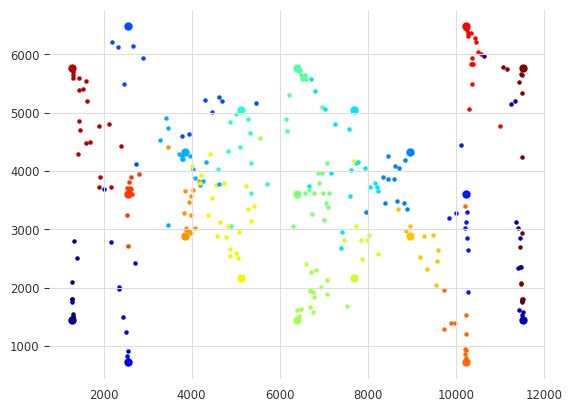

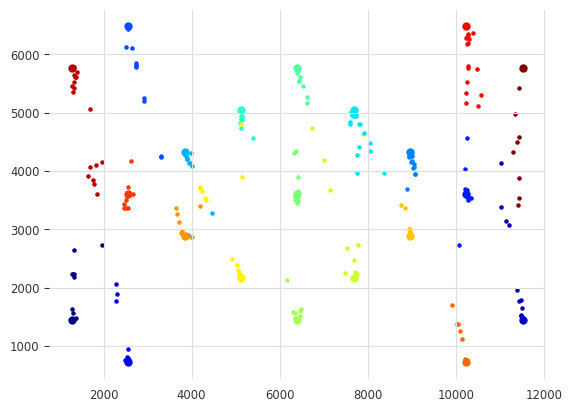

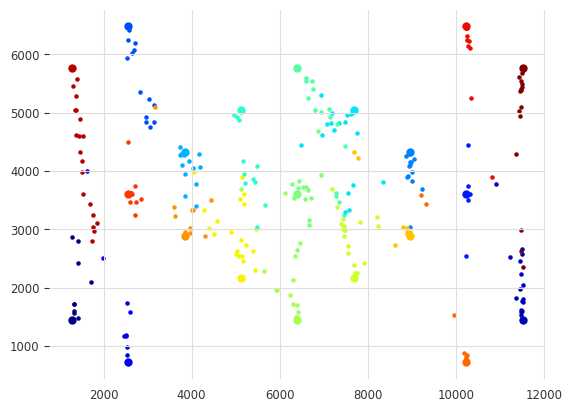

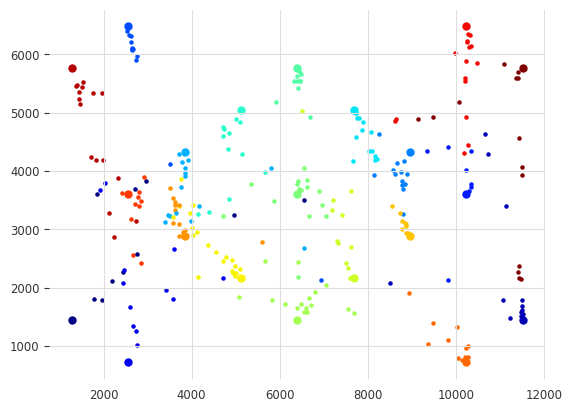

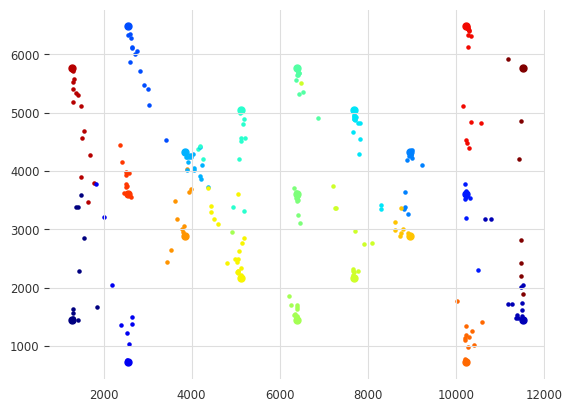

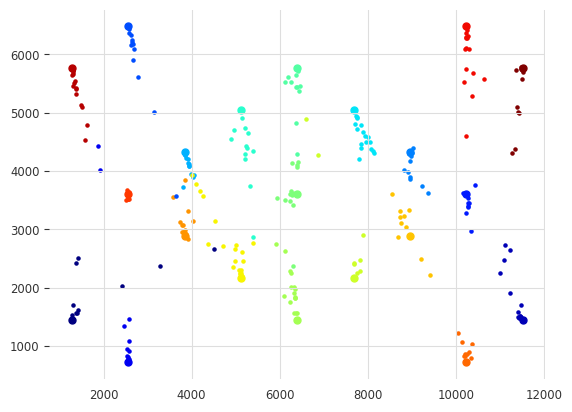

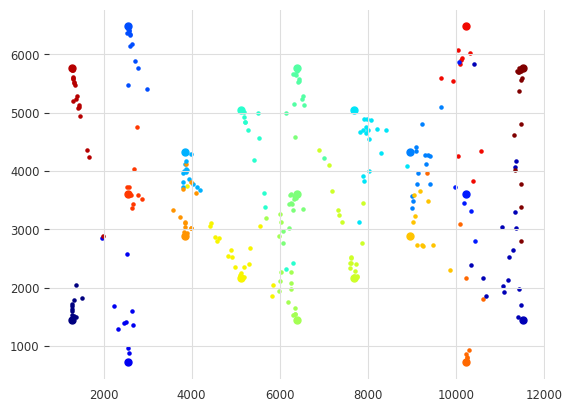

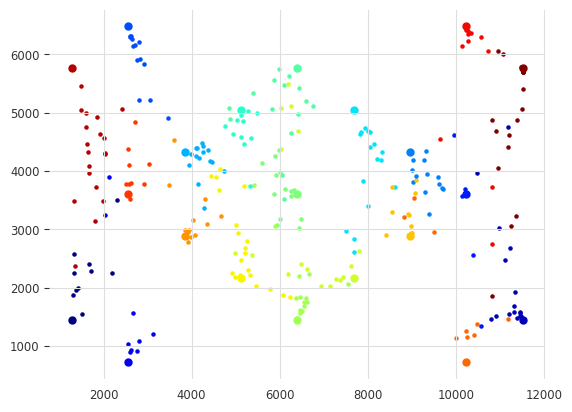

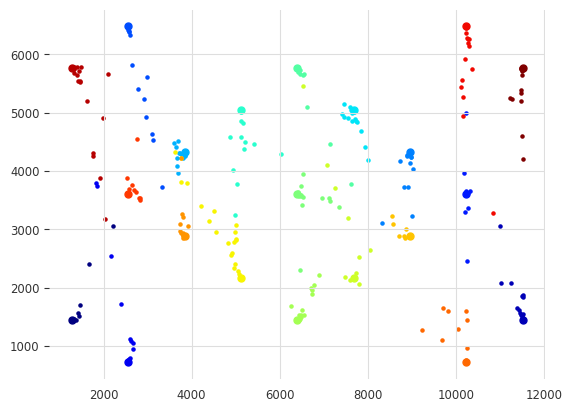

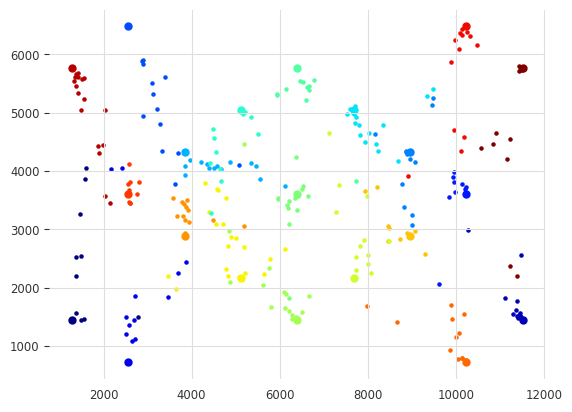

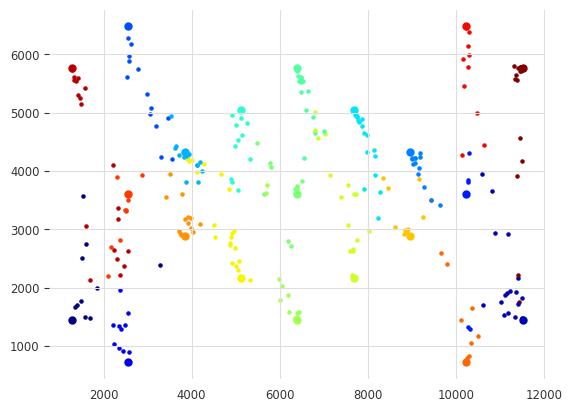

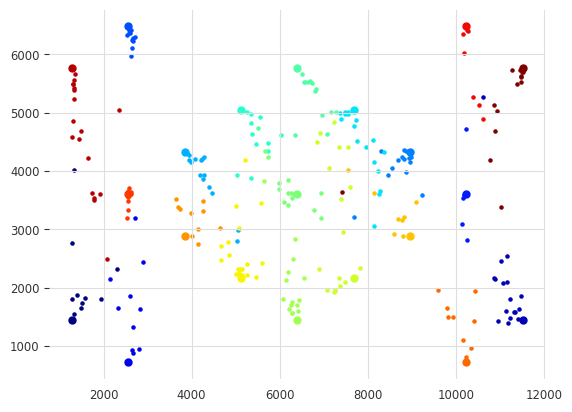

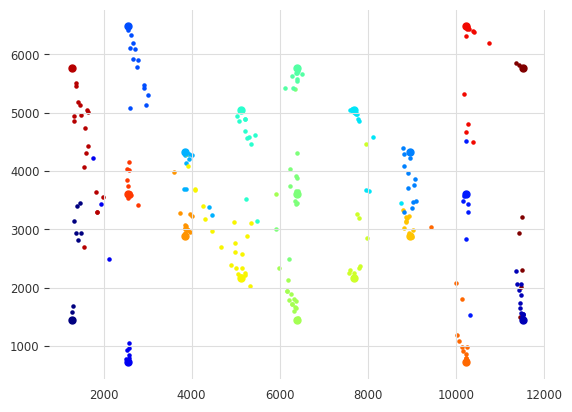

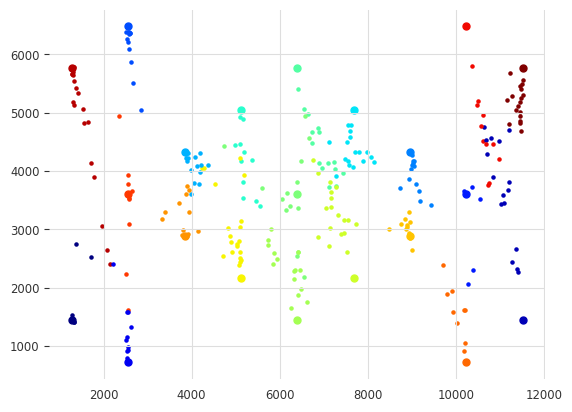

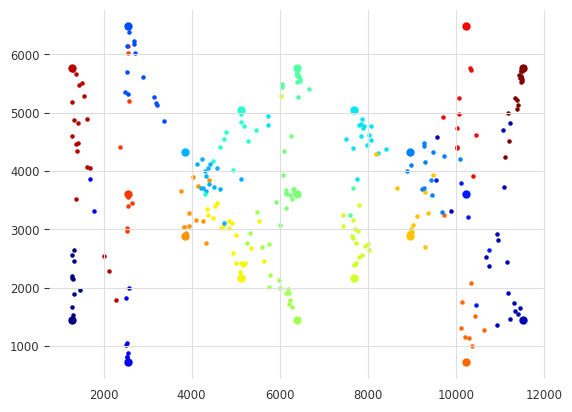

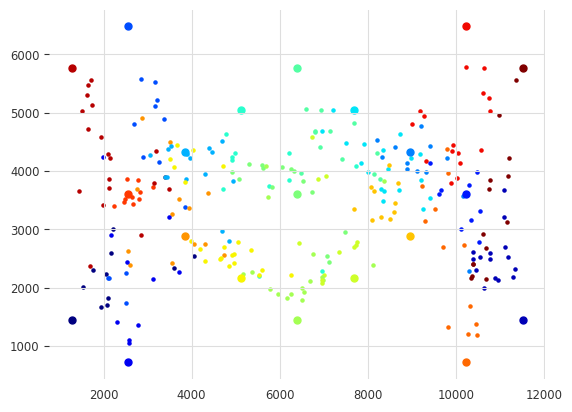

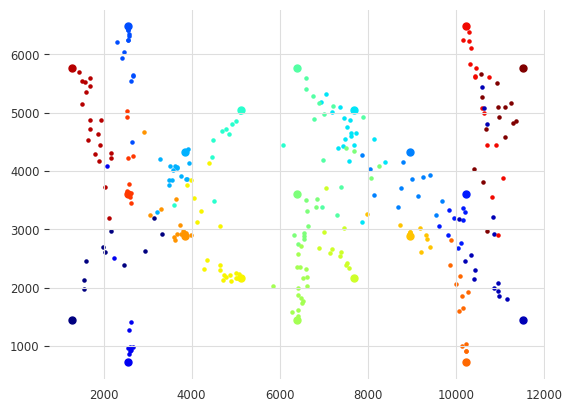

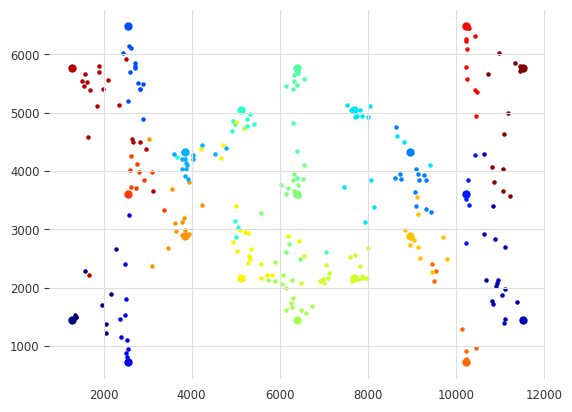

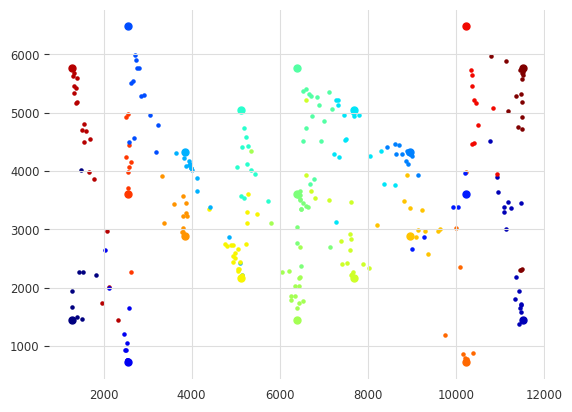

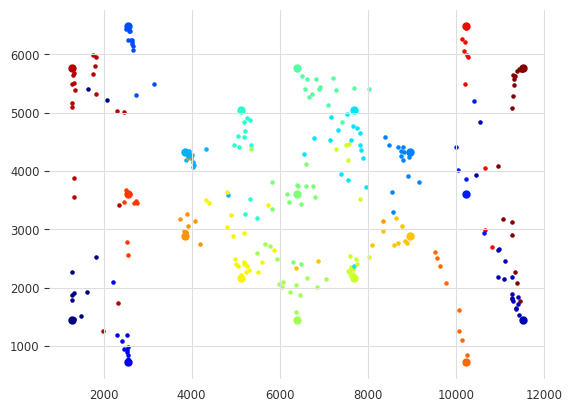

In [2]:
for dd in range(57):
    original_data = pd.read_csv("../participant_wise_test_data/participant_{}_test_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        list_data = ast.literal_eval(original_data.iloc[i,0])
        temp.append(list_data)
        temp.append(ast.literal_eval(original_data.iloc[i,1]))
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,0]
    y = df.iloc[:,1]
    # print(X.head())
    loaded_unscaled_model = load('../participant_wise_models/participant_{}_model.joblib'.format(dd))
    # plt.style.use("seaborn-white")
    # fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

    unknown_test_list = []
    for j in range(len(X)):
        temp = []
        for l in X[j]:
            temp.append(l)
        unknown_test_list.append(temp)
    y_pred = loaded_unscaled_model.predict(unknown_test_list)


    # time_series_data = X
    # targets = y

    # data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    # X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    # y = np.array(data['target'])

    target_colors = plt.cm.jet(np.linspace(0, 1, 21))

    target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
    color_list = {str([1,2]): target_colors[0],str([1,8]): target_colors[19],str([2,1]): target_colors[2],str([2,5]):target_colors[17],str([2,9]):target_colors[4],str([3,4]):target_colors[15],str([3,6]):target_colors[6],str([4,3]):target_colors[13],str([4,7]):target_colors[8],str([5,2]):target_colors[11],str([5,5]):target_colors[10],str([5,8]):target_colors[9],str([6,3]):target_colors[12],str([6,7]):target_colors[7],str([7,4]):target_colors[14],str([7,6]):target_colors[5],str([8,1]):target_colors[16],str([8,5]):target_colors[3],str([8,9]):target_colors[18],str([9,2]):target_colors[1],str([9,8]):target_colors[20]}

    image = cv2.imread('../../new_data_training/points.jpg')
    image_height, image_width, _ = image.shape
    # scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    scaled_target_points_color = [color_list[str(i)] for i in y]

    counter = 0
    for point in scaled_predicted_points:
        plt.scatter(point[0], point[1], color=scaled_target_points_color[counter], s=5, marker='o')  # Adjust marker size and color as needed
        counter += 1

    for point in target:
        plt.scatter(int(point[0] * image_width), int(point[1] * image_height), color=color_list[str(point)], s=25, marker='o')  # Adjust marker size and color as needed


    # Show the plot
    plt.show()


# Heatmap for unscaled prediction

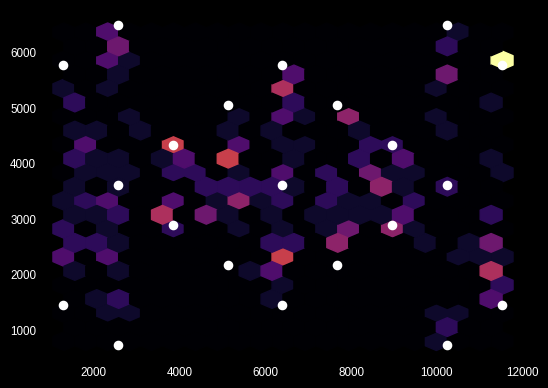

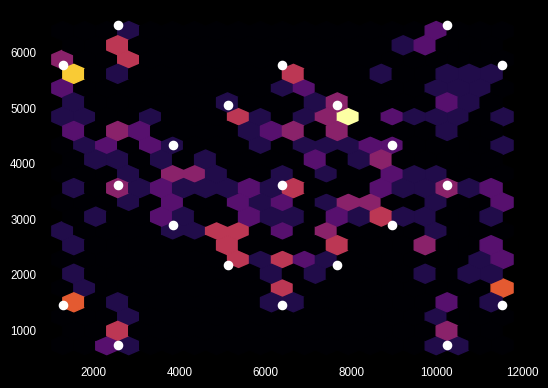

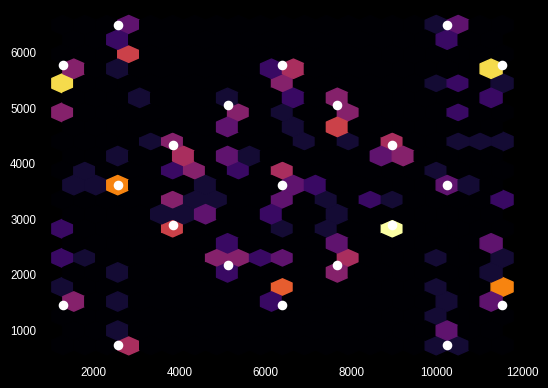

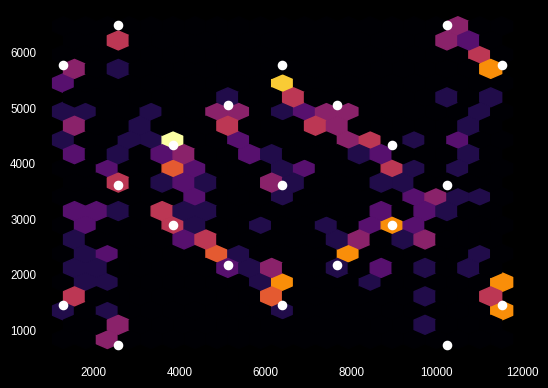

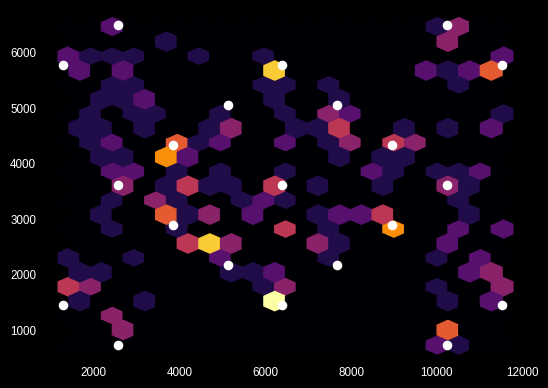

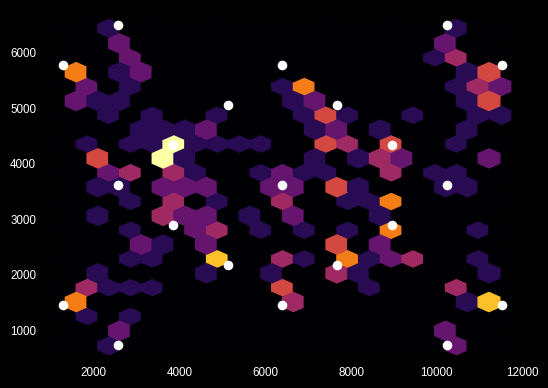

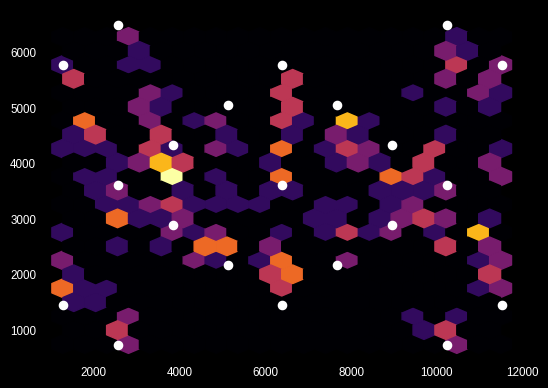

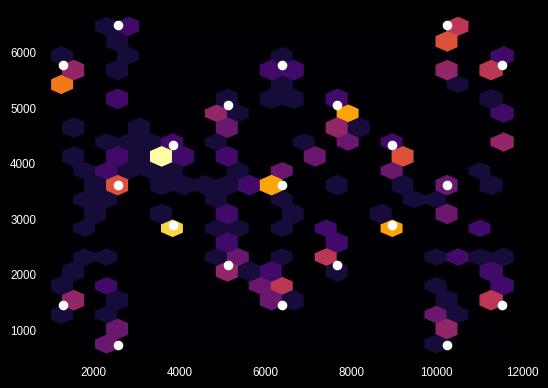

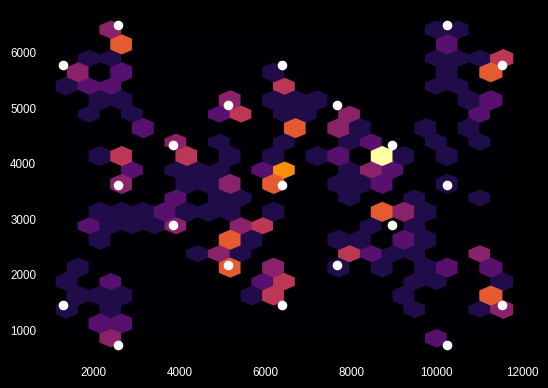

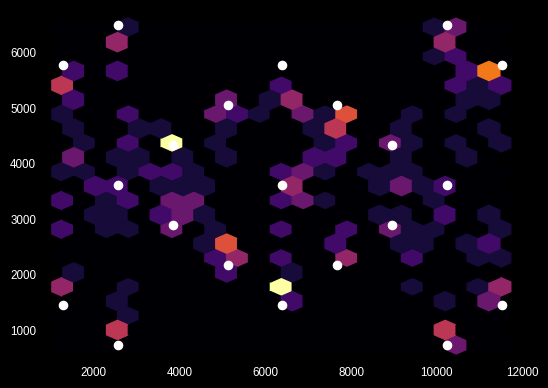

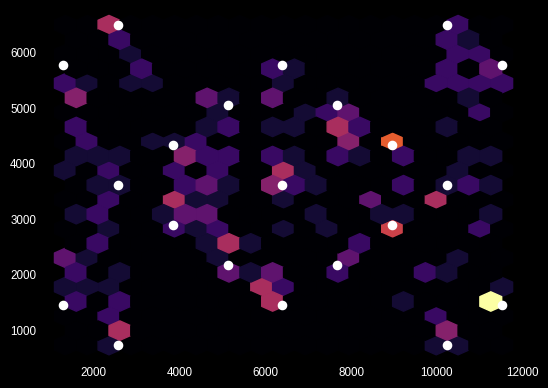

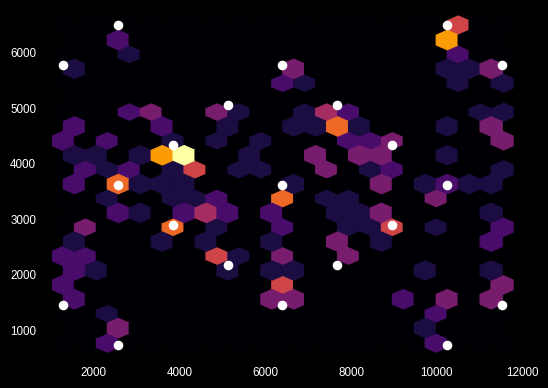

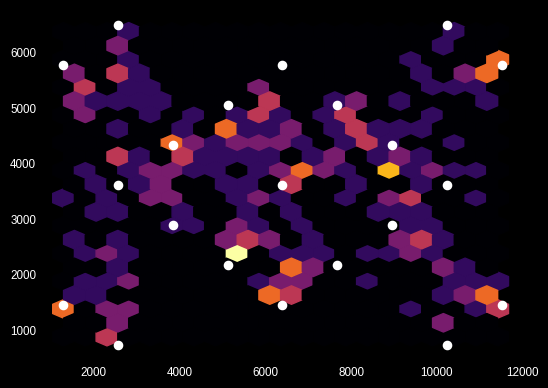

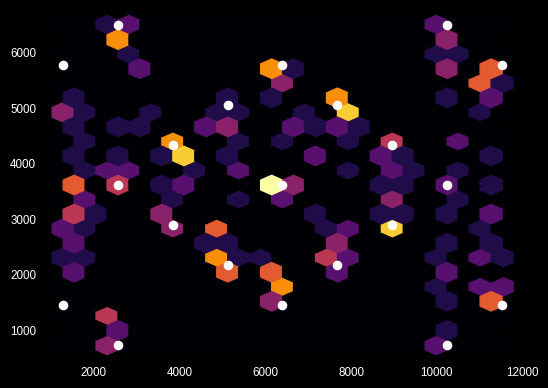

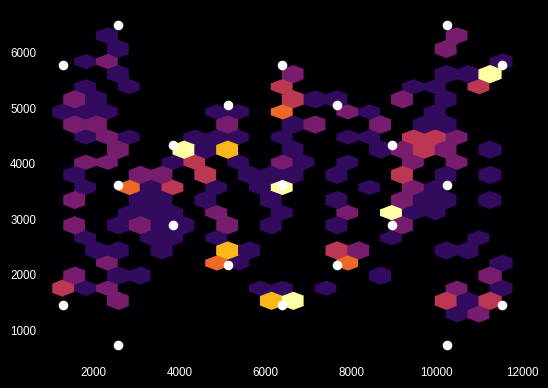

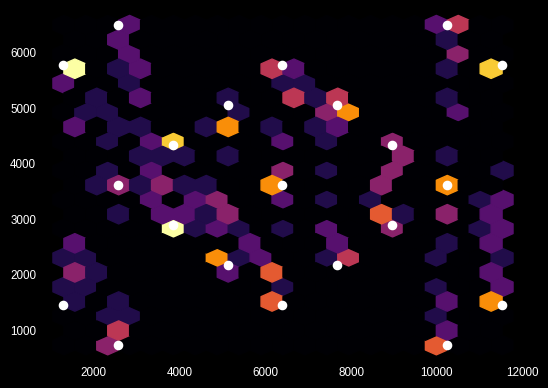

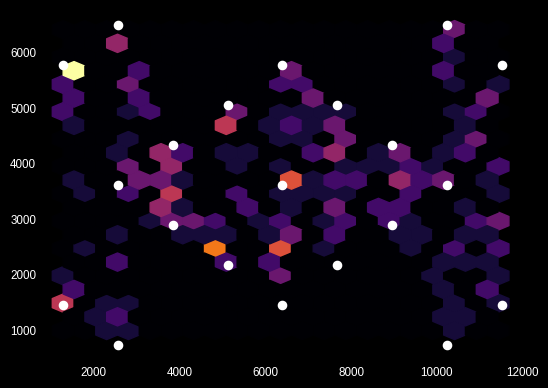

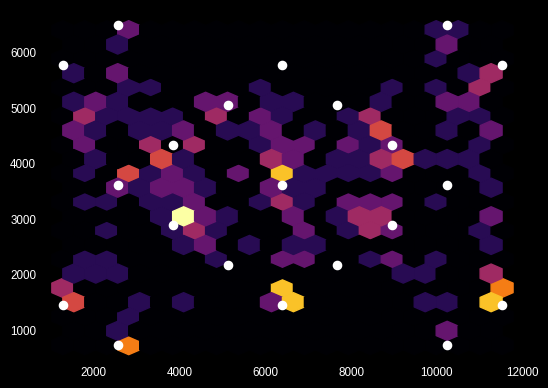

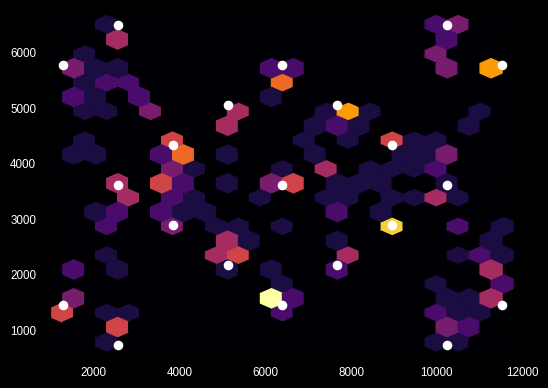

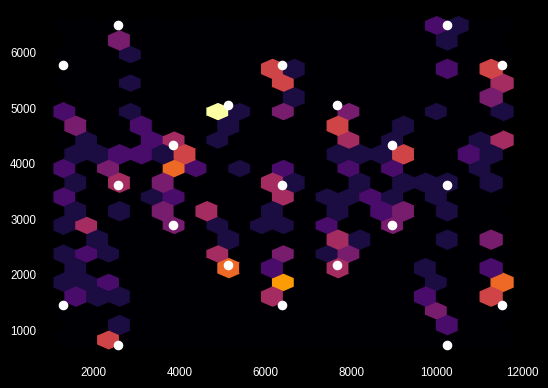

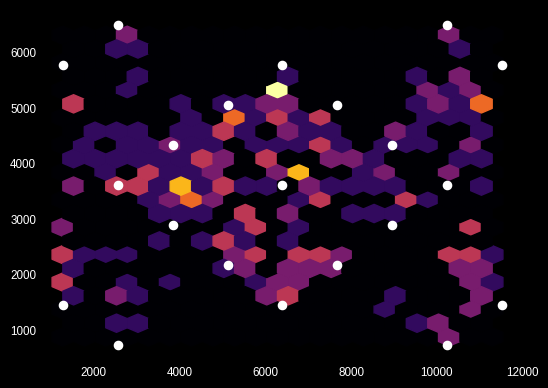

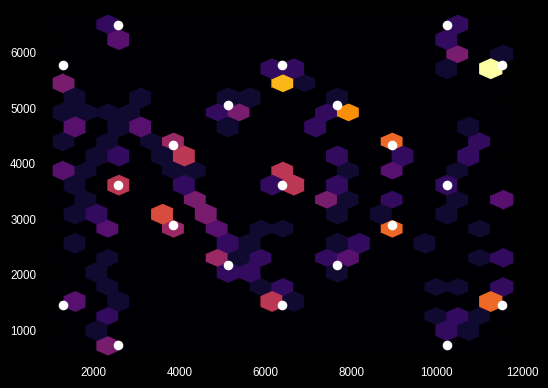

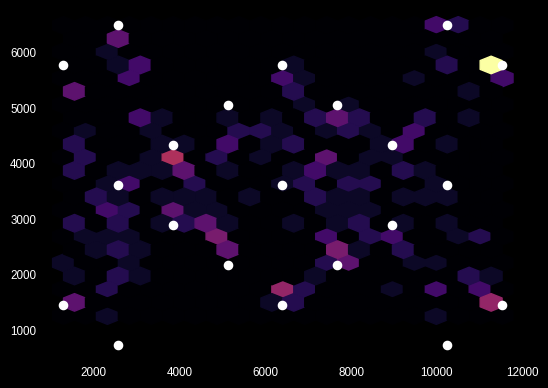

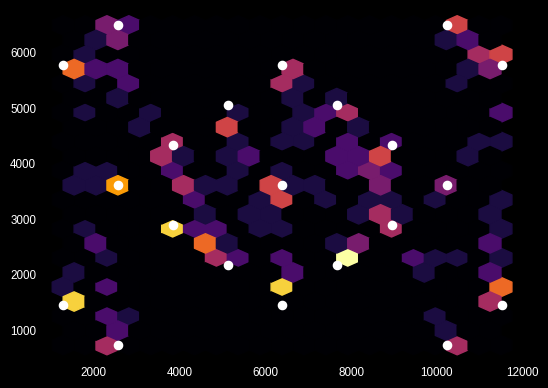

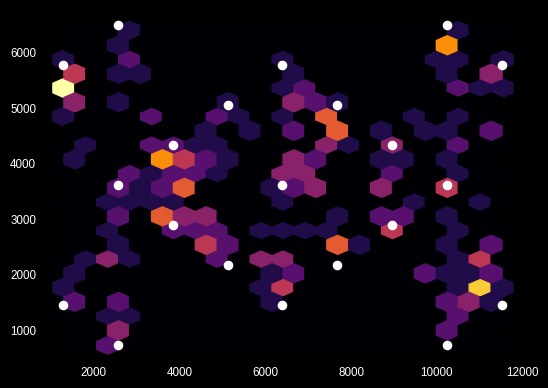

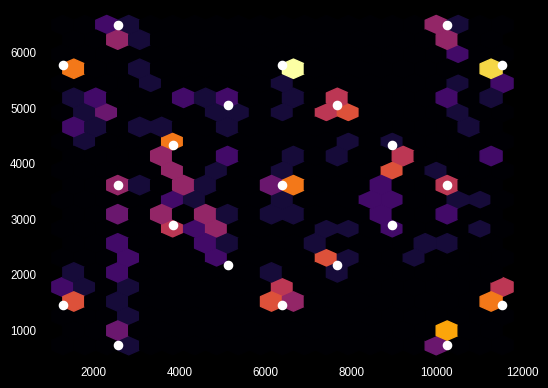

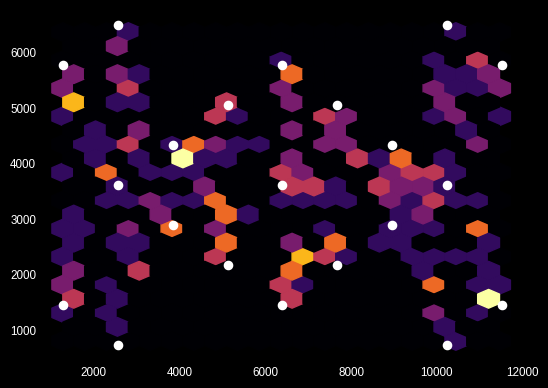

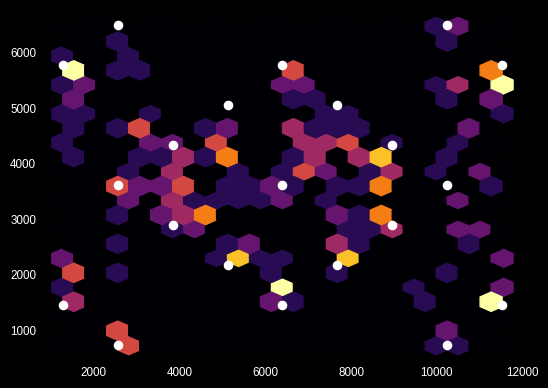

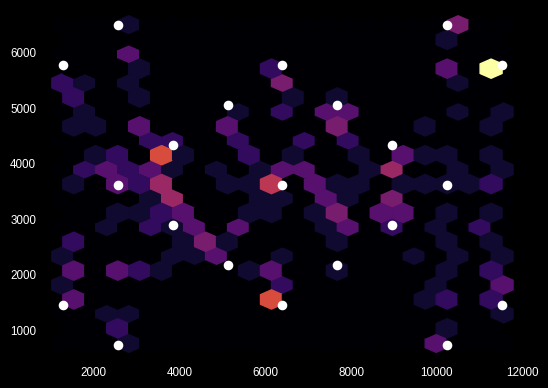

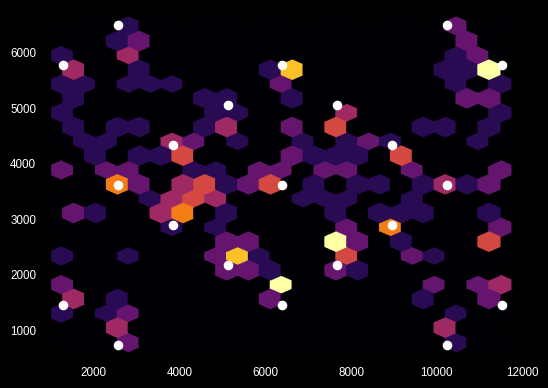

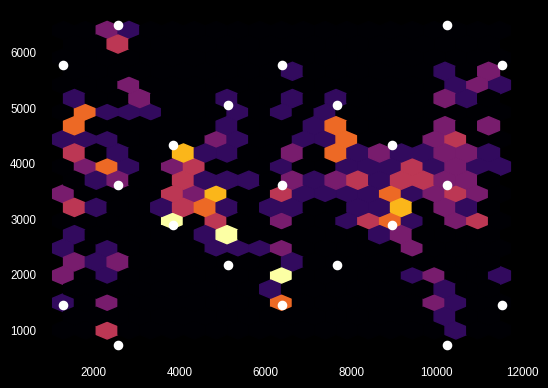

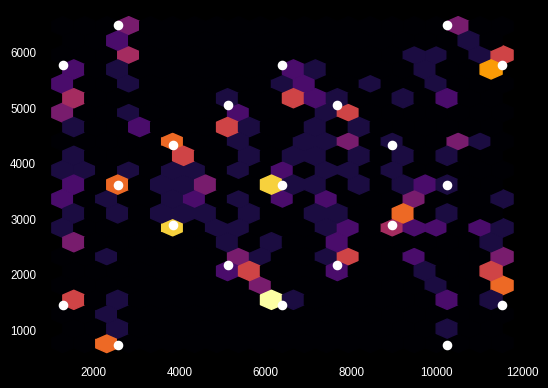

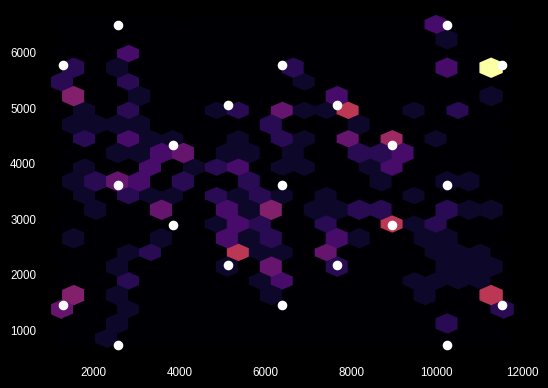

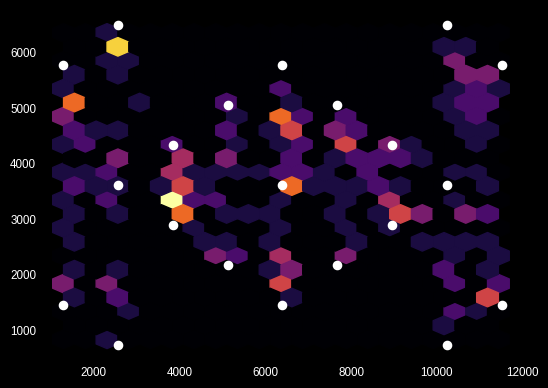

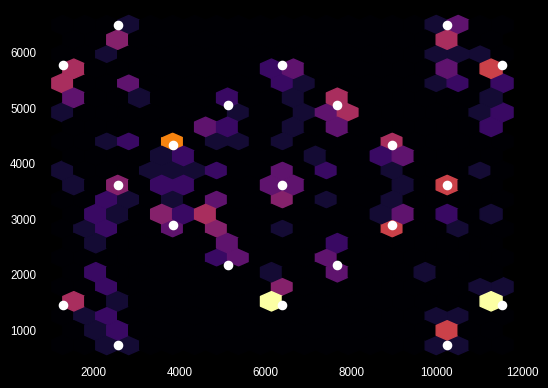

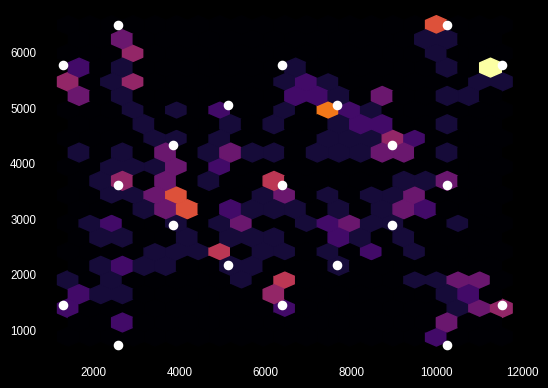

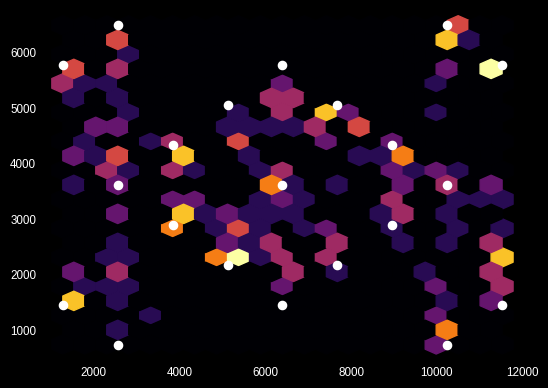

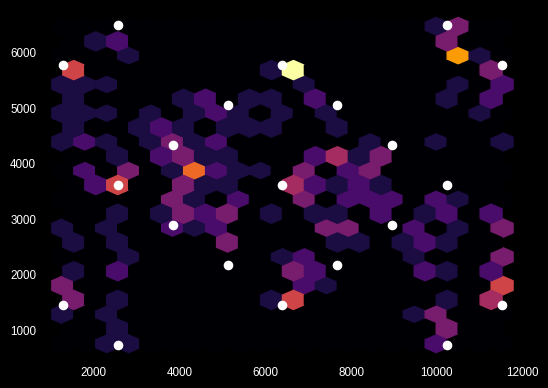

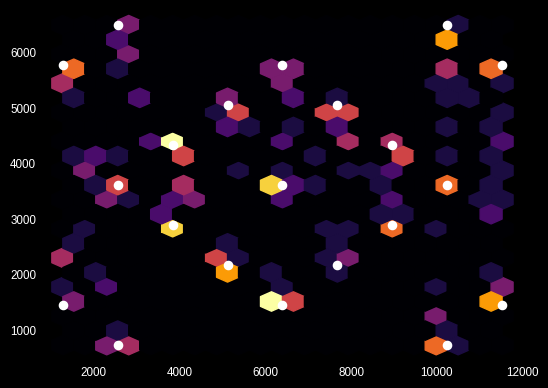

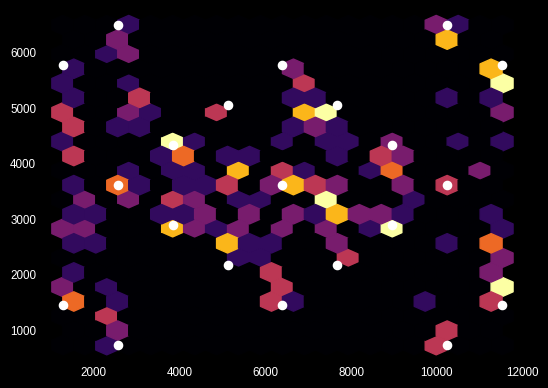

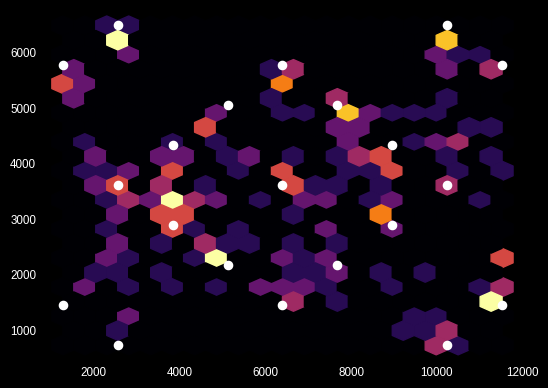

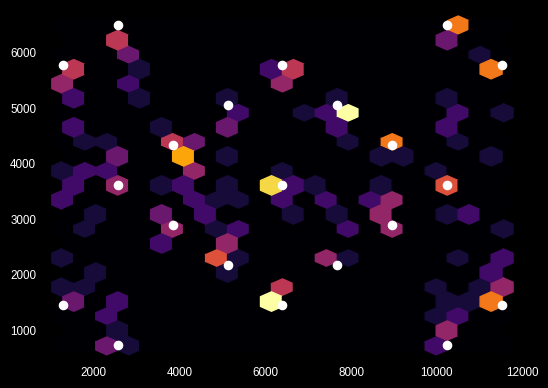

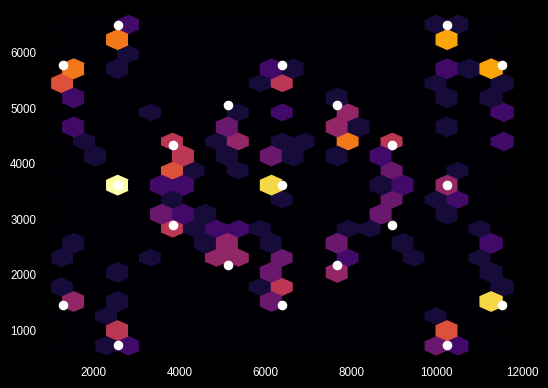

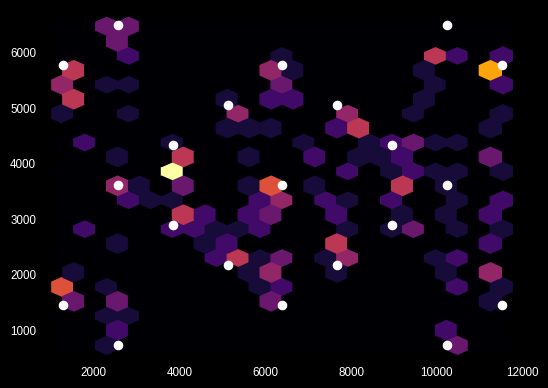

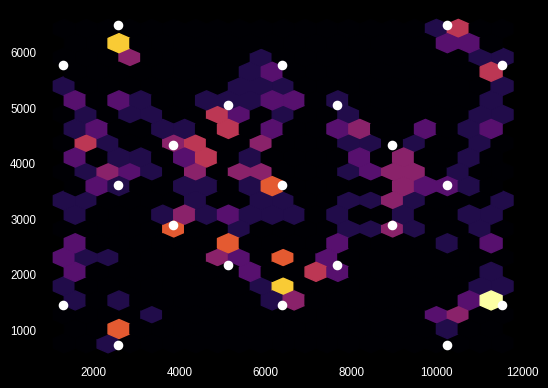

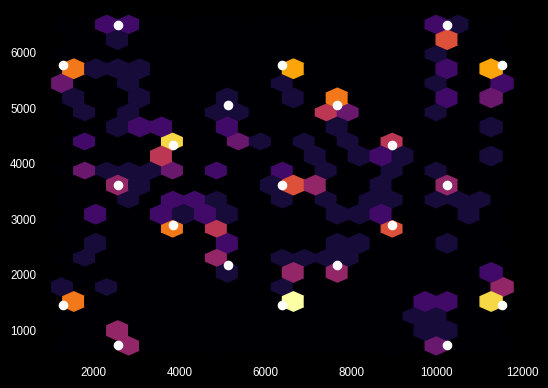

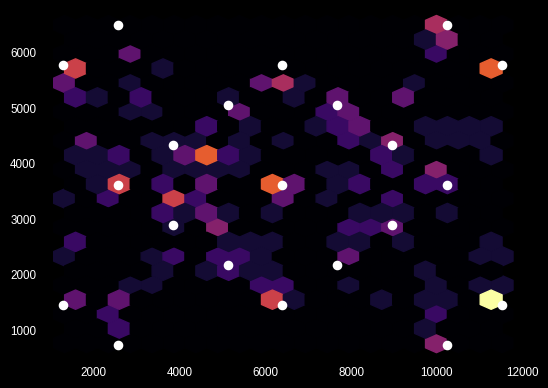

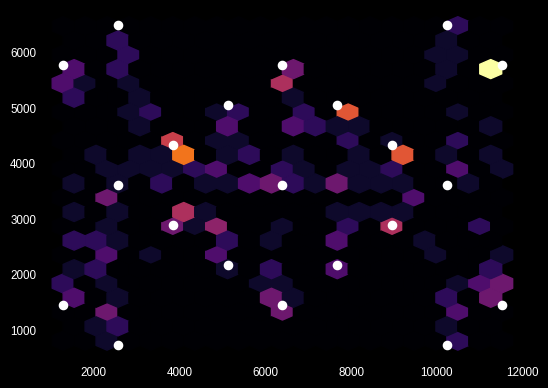

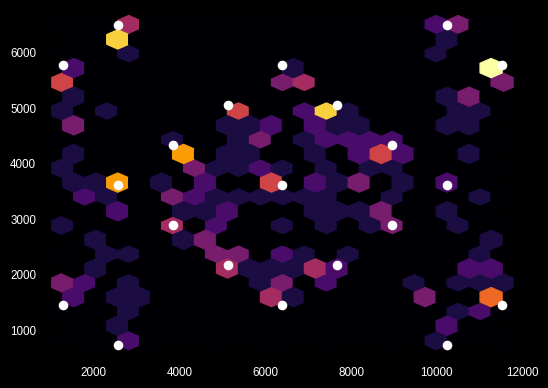

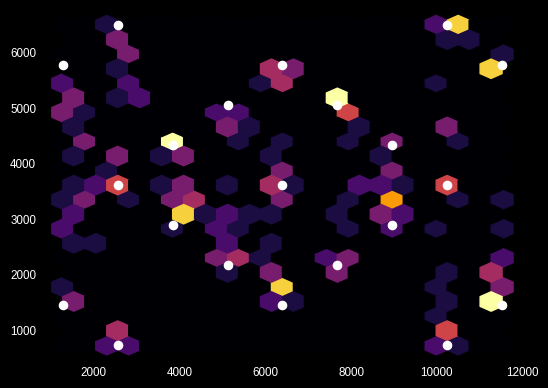

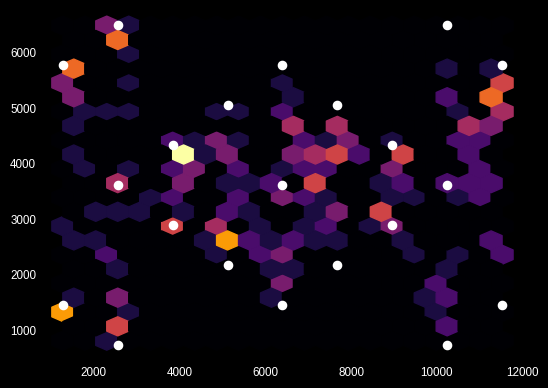

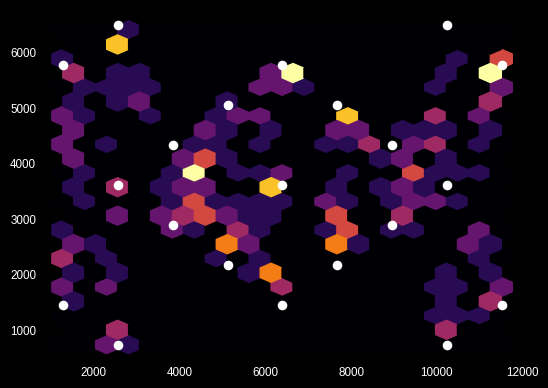

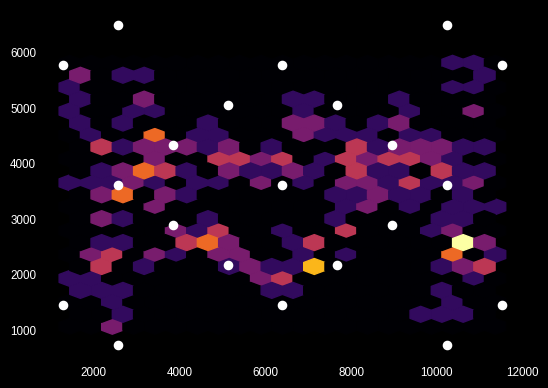

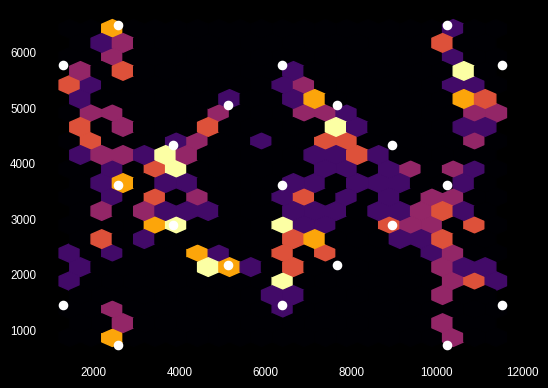

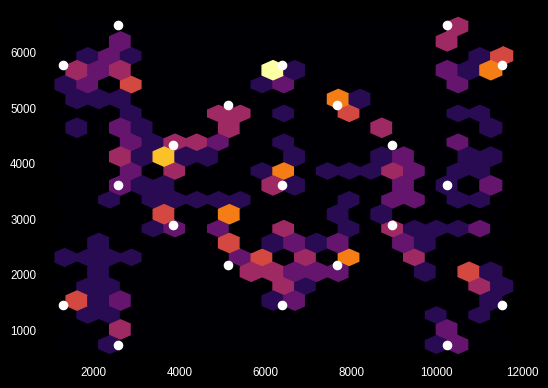

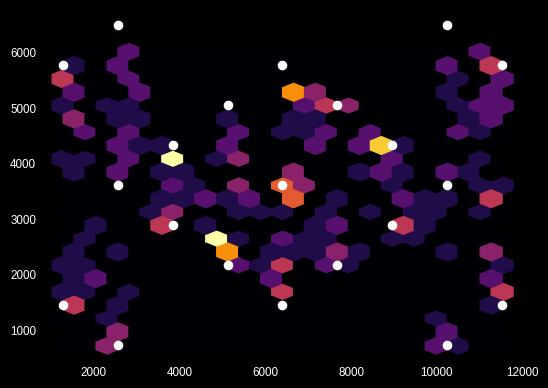

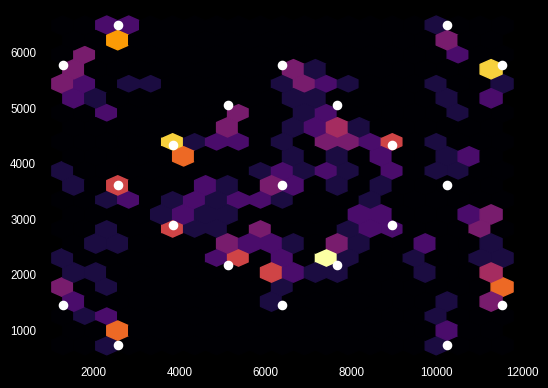

In [6]:
target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
image = cv2.imread('../../new_data_training/points.jpg')
image_height, image_width, _ = image.shape
scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

for m in range(57):
    original_data = pd.read_csv("../participant_wise_test_data/participant_{}_test_data.csv".format(m))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        list_data = ast.literal_eval(original_data.iloc[i,0])
        temp.append(list_data)
        temp.append(ast.literal_eval(original_data.iloc[i,1]))
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,0]
    y = df.iloc[:,1]
    loaded_unscaled_model = load('../participant_wise_models/participant_{}_model.joblib'.format(m))

    unknown_test_list = []
    for j in range(len(X)):
        temp = []
        for l in X[j]:
            temp.append(l)
        unknown_test_list.append(temp)
    y_pred = loaded_unscaled_model.predict(unknown_test_list)


    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
    plt.style.use("dark_background")
    # fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 10))
    
    row = 0
    unscaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]

    x_coord = [coord[0] for coord in unscaled_predicted_points]
    y_coord = [coord[1] for coord in unscaled_predicted_points]

    hb = plt.hexbin(x_coord, y_coord, gridsize=20, cmap='inferno')
    for point in scaled_targets:
        plt.scatter(point[0], point[1], color='white', s=35, marker='o')
    
    plt.grid(False)
    row += 1

    plt.tight_layout(pad=4.0)  
    plt.grid(False)
    plt.show()


# Prediction for scaled data

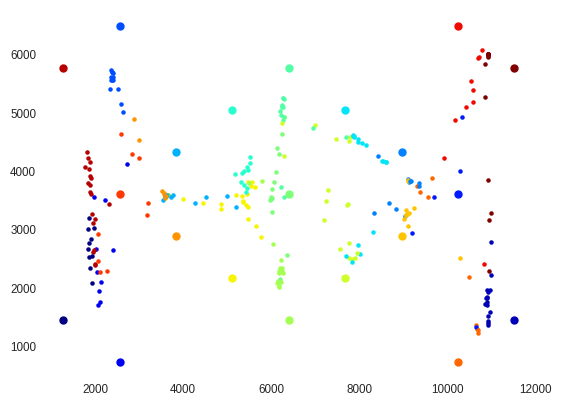

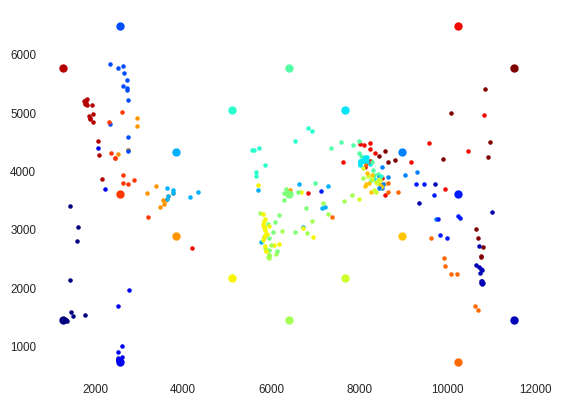

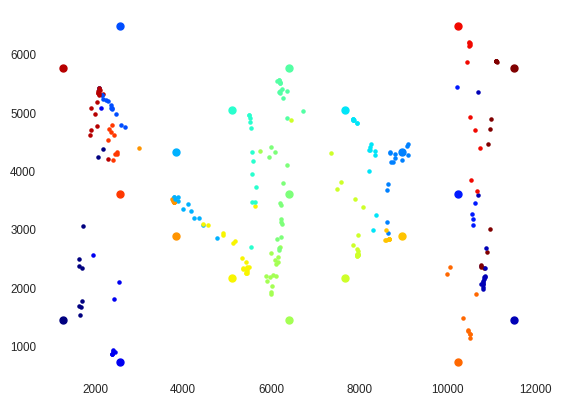

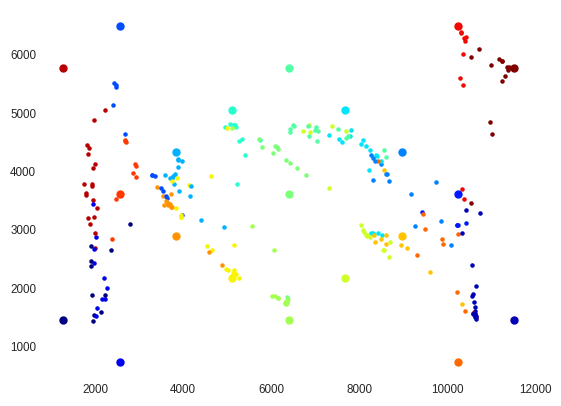

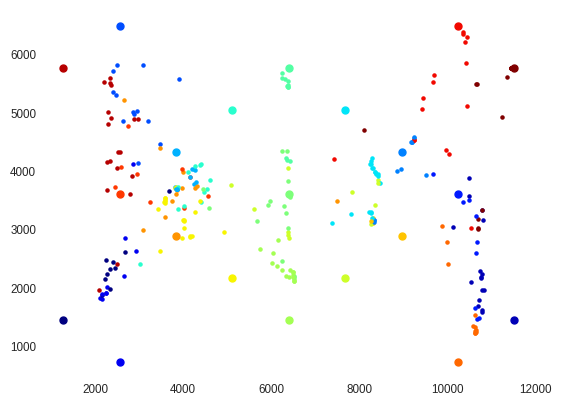

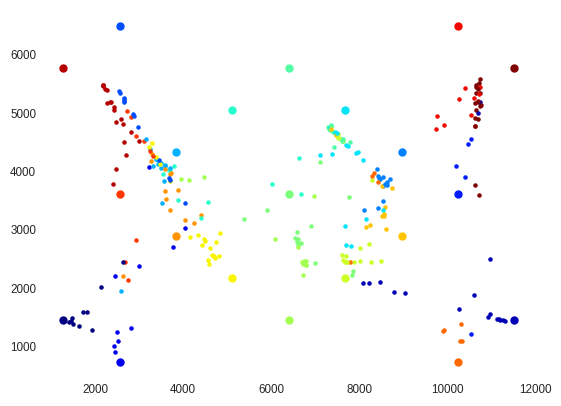

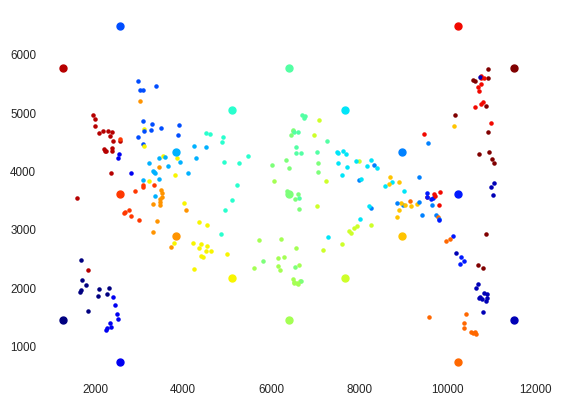

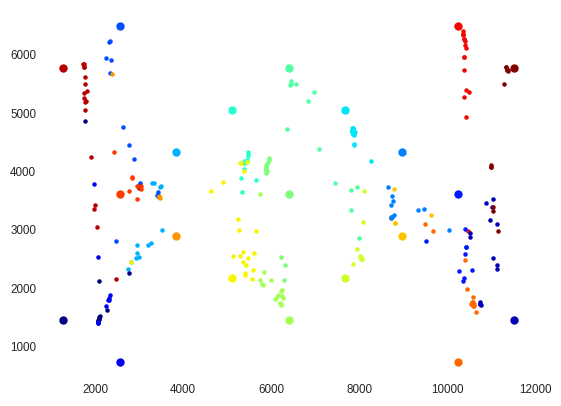

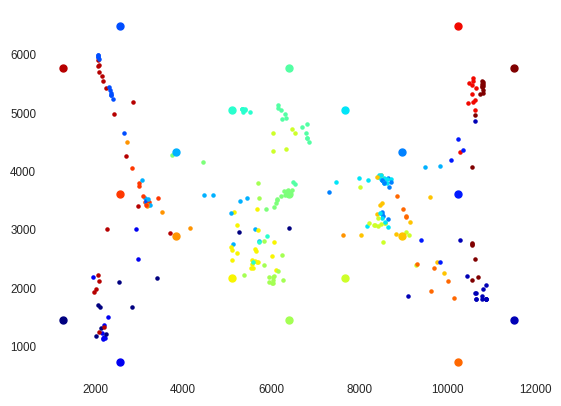

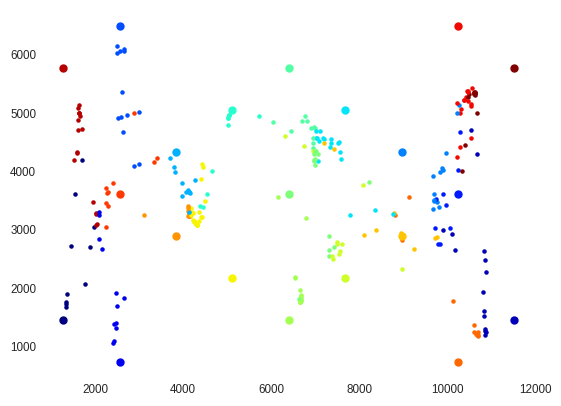

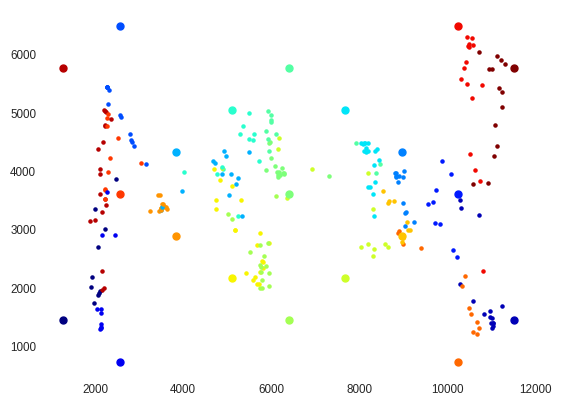

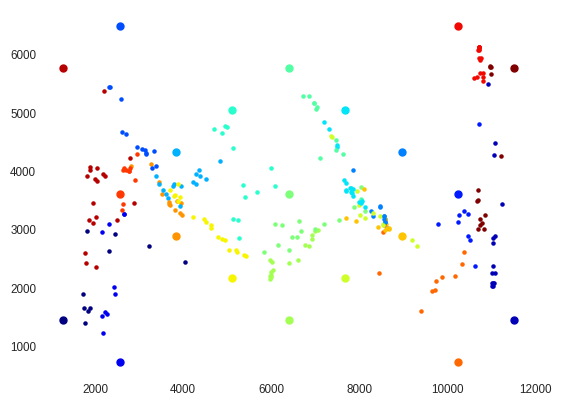

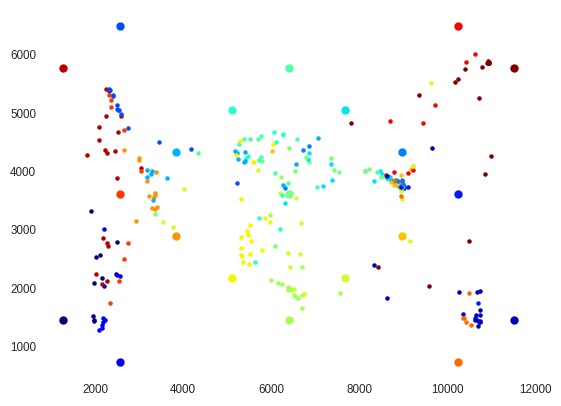

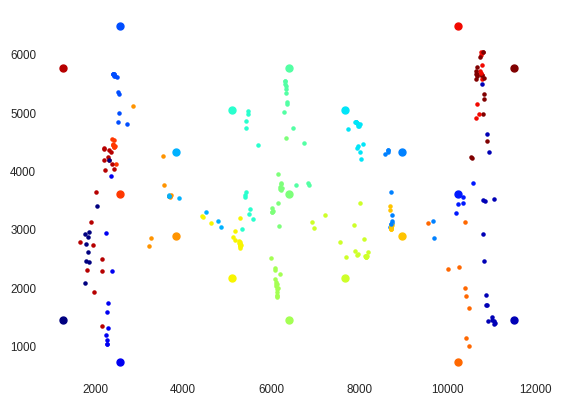

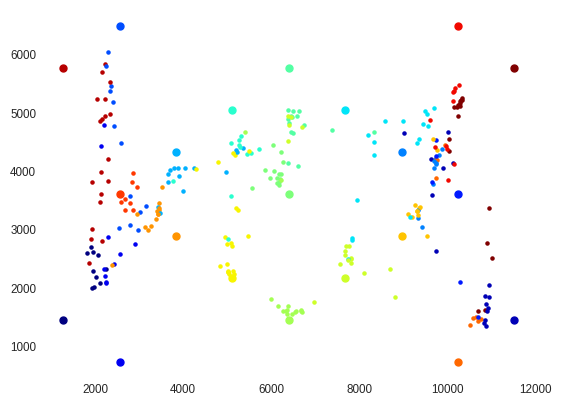

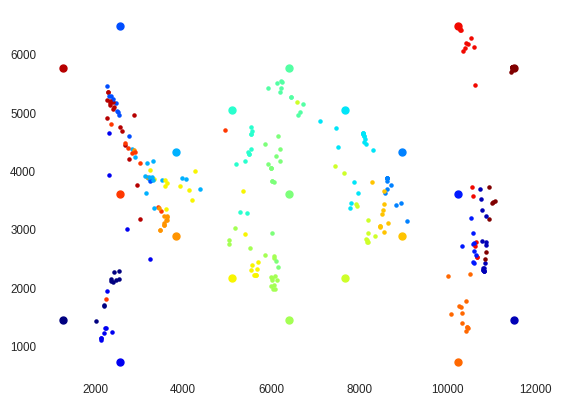

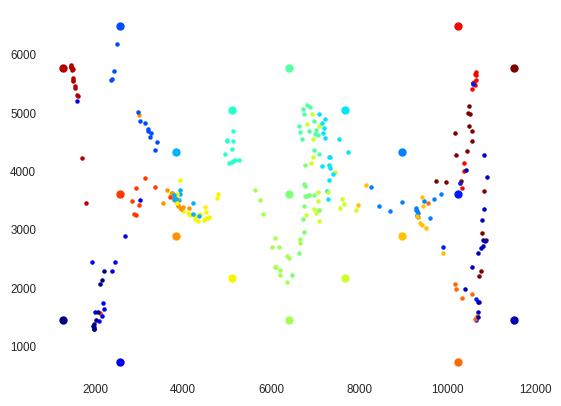

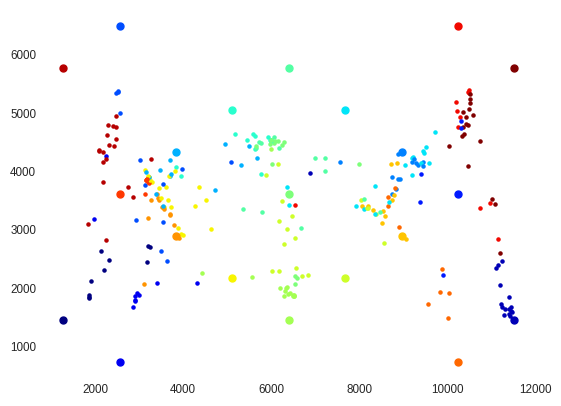

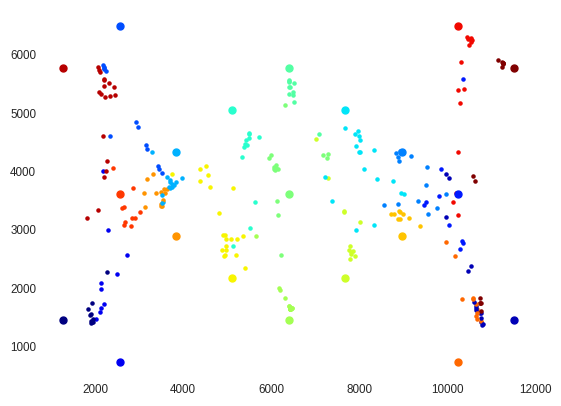

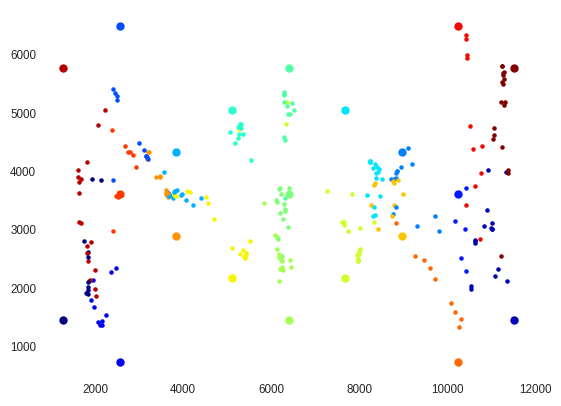

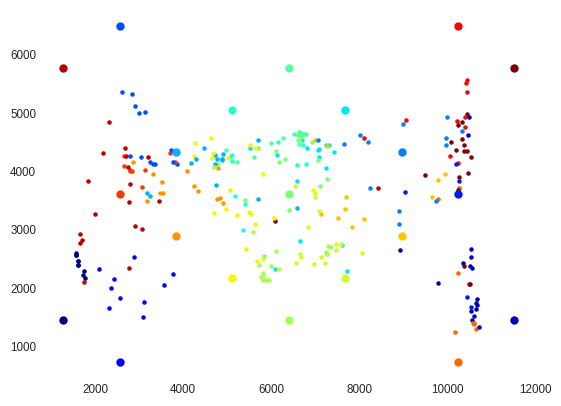

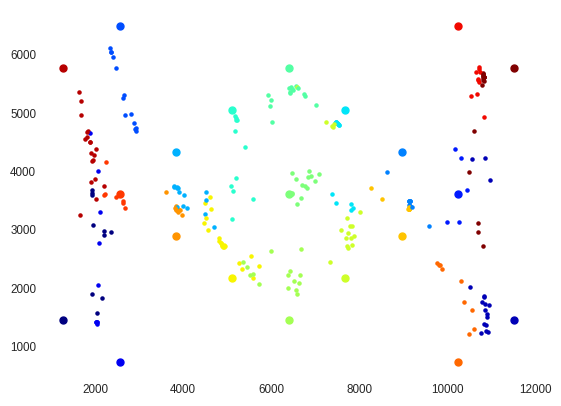

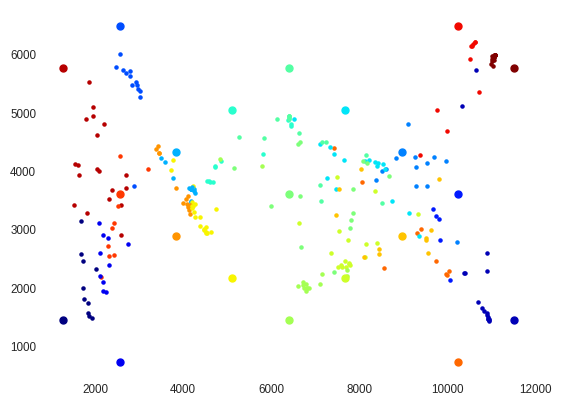

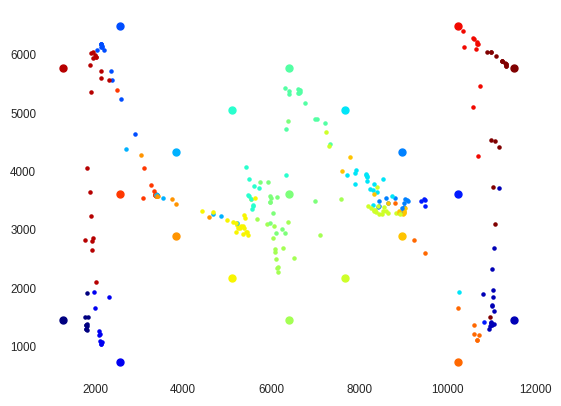

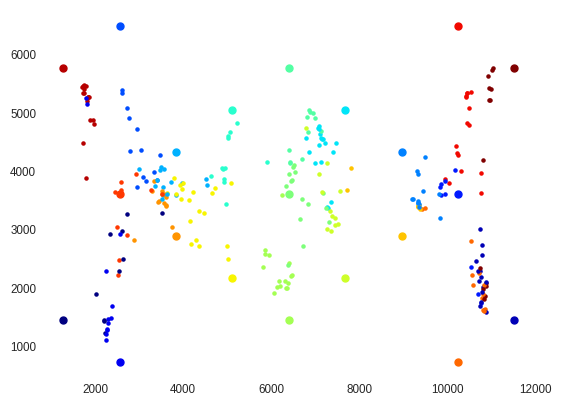

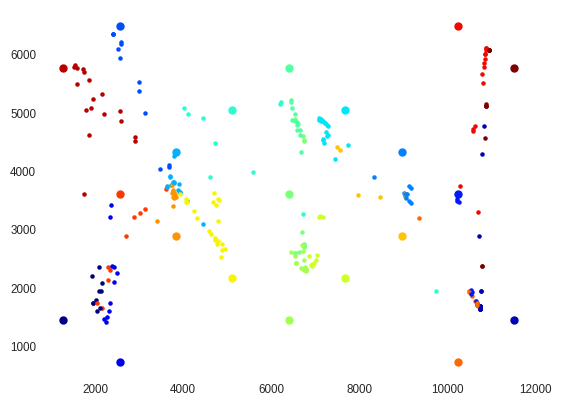

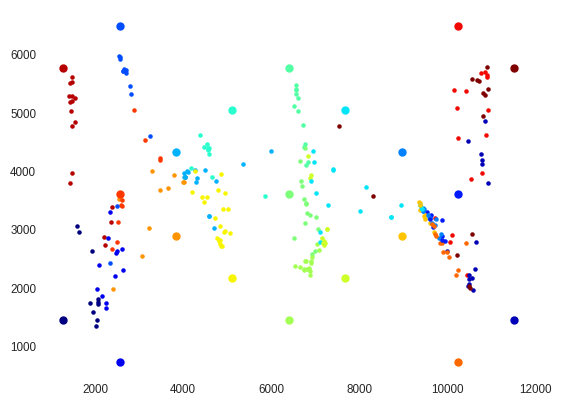

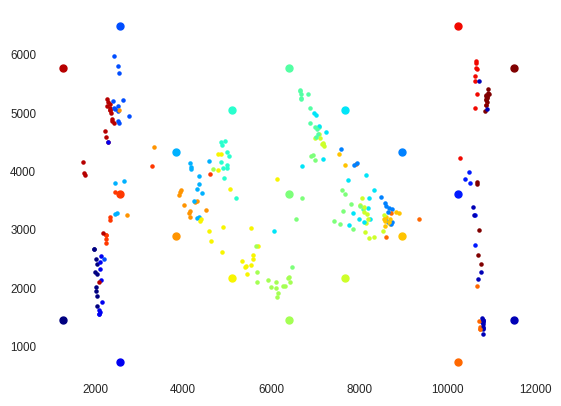

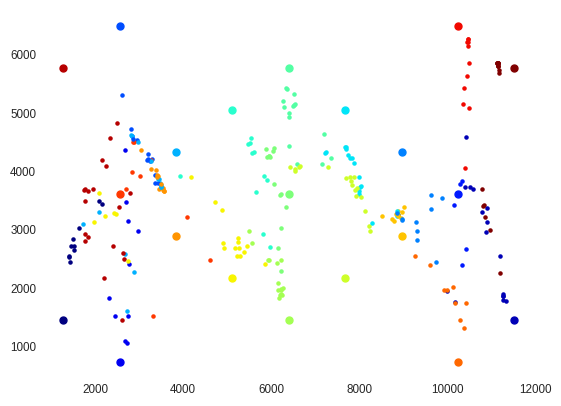

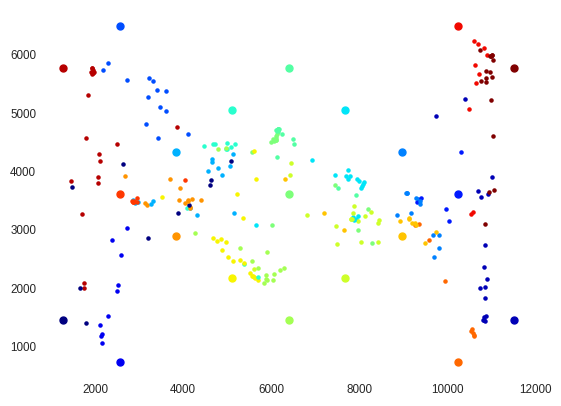

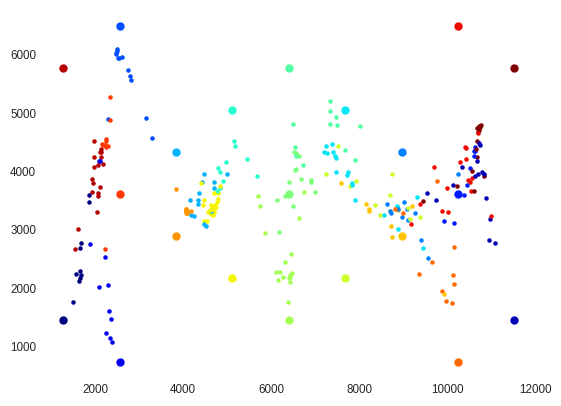

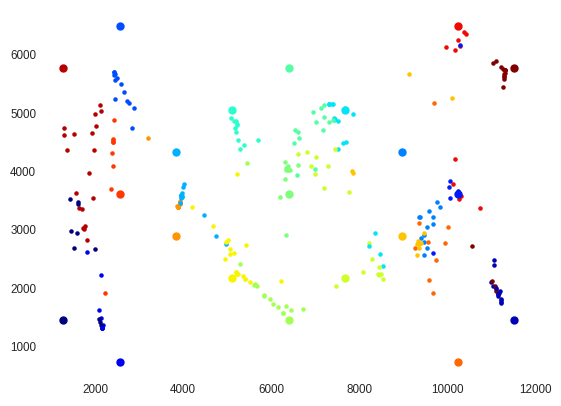

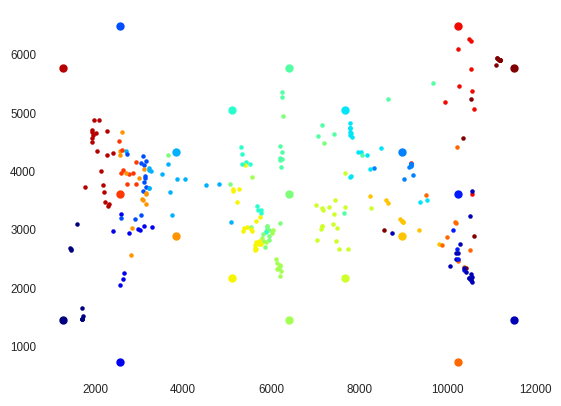

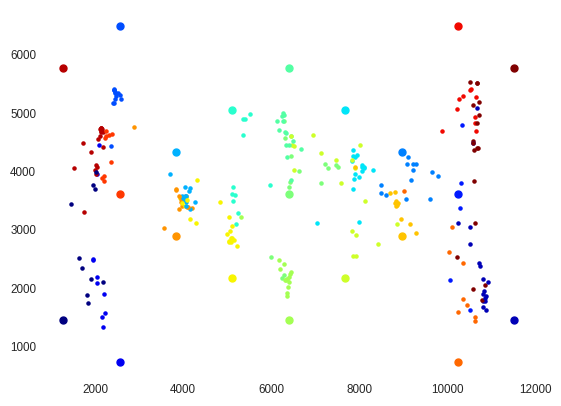

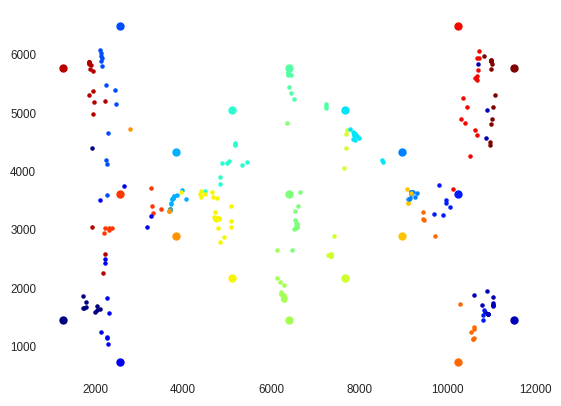

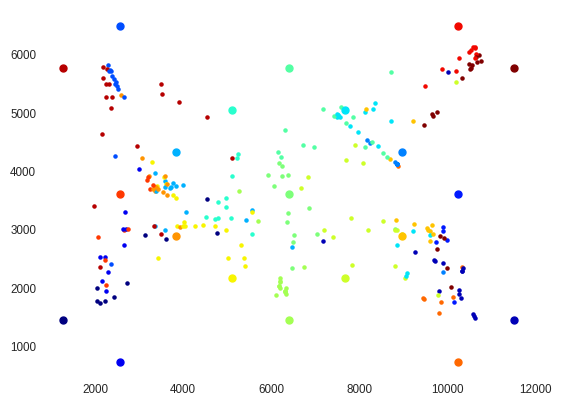

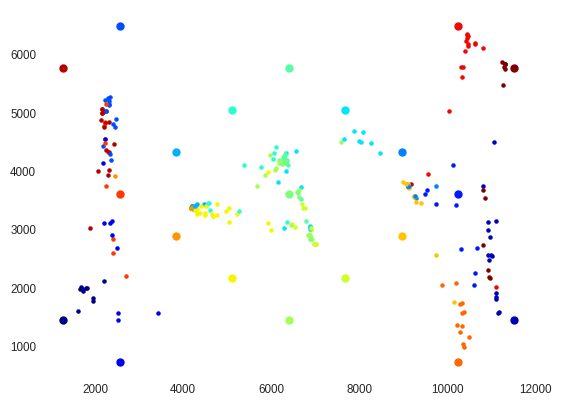

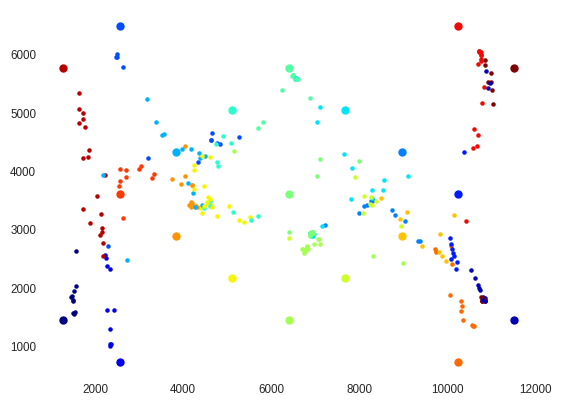

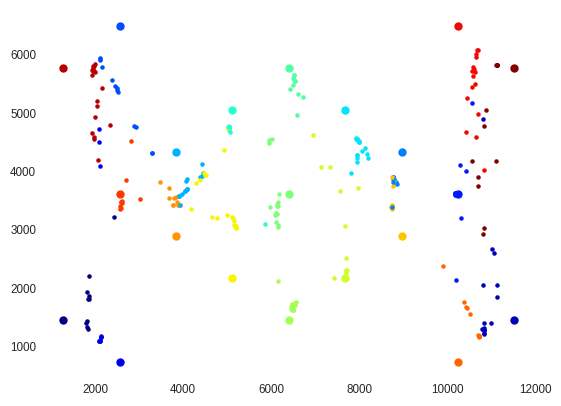

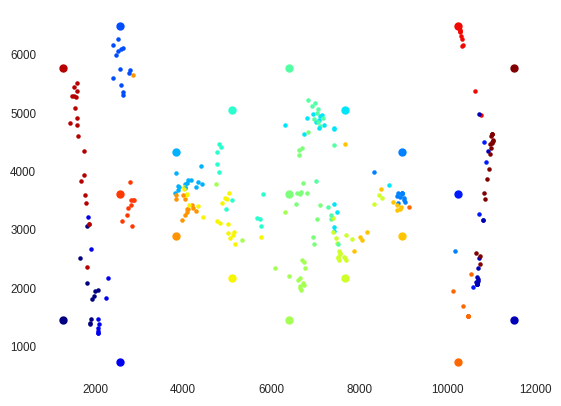

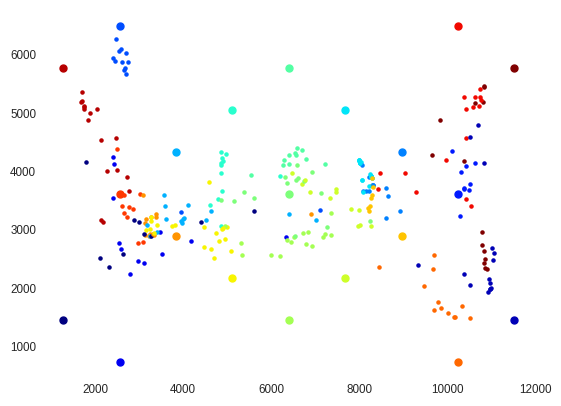

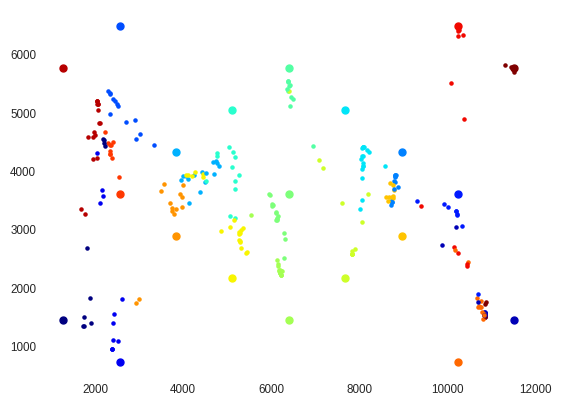

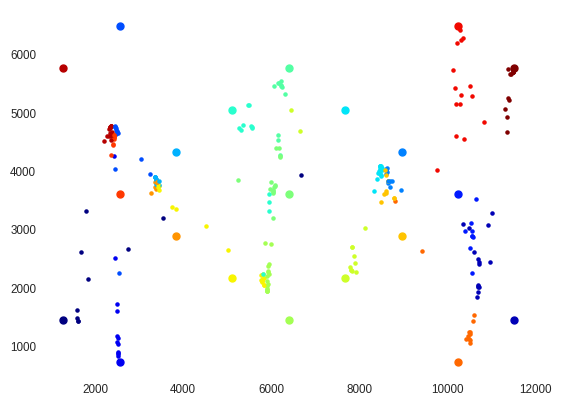

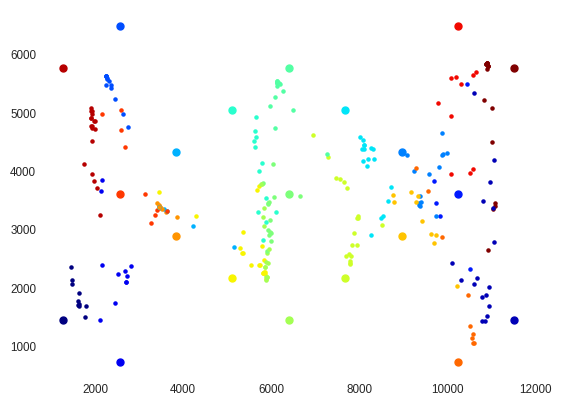

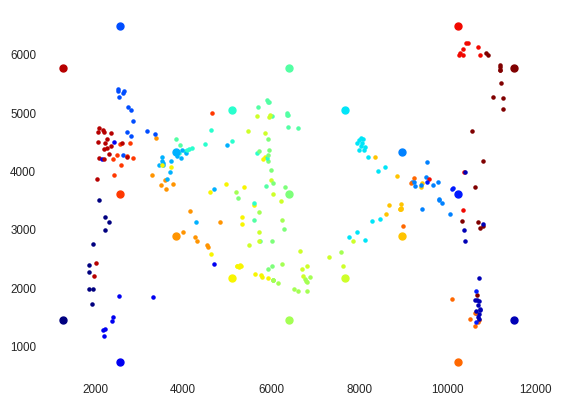

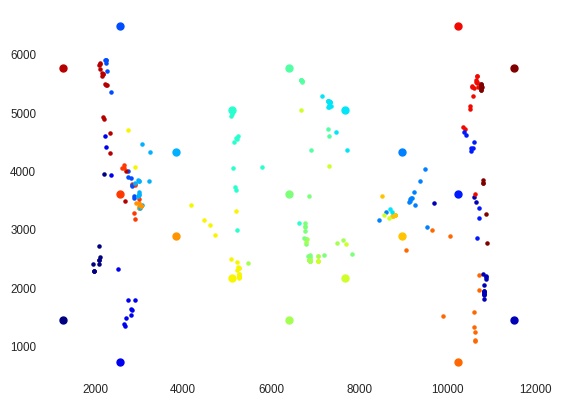

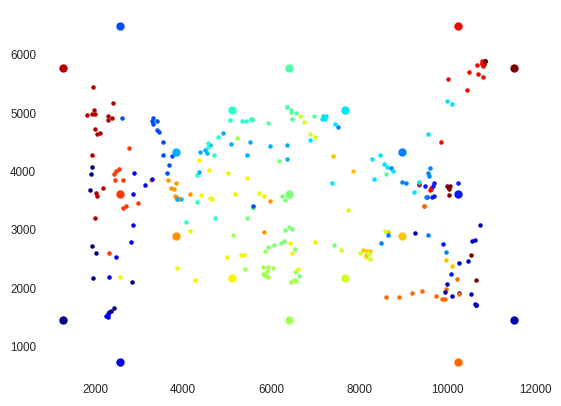

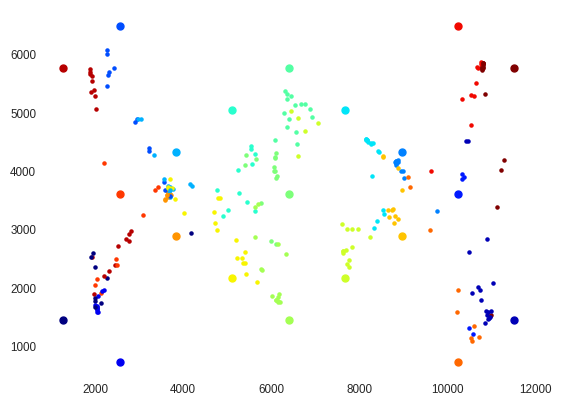

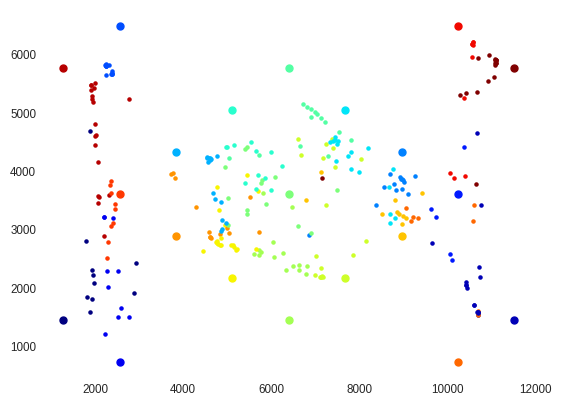

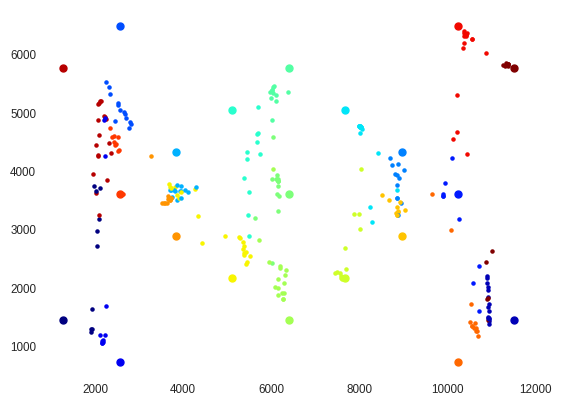

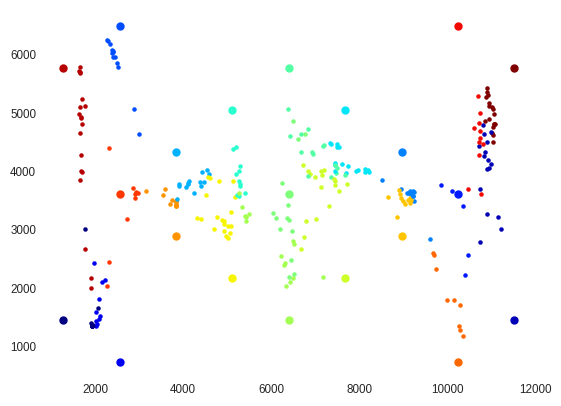

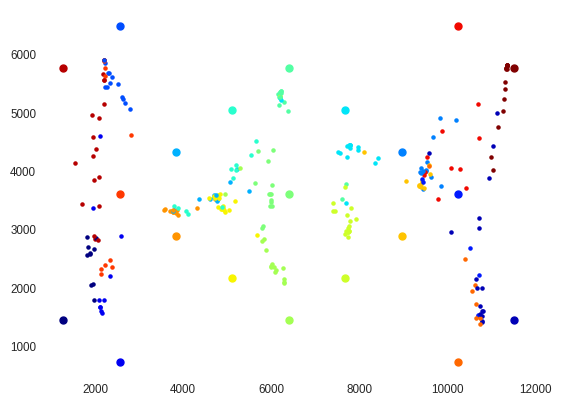

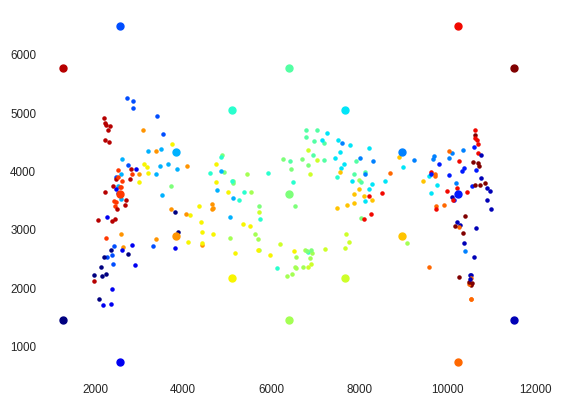

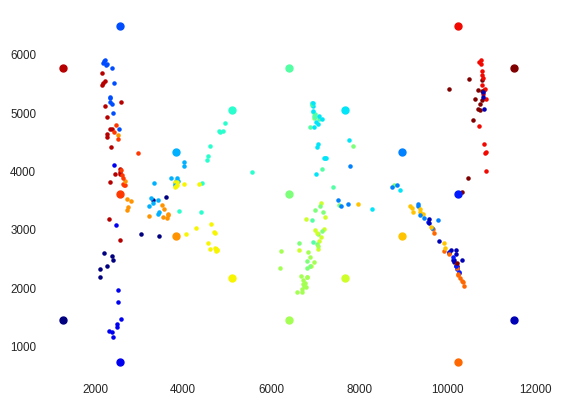

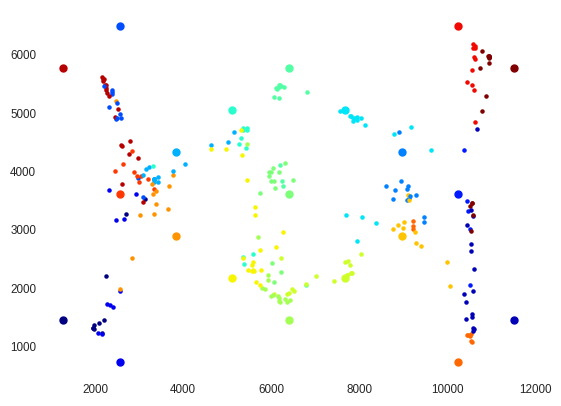

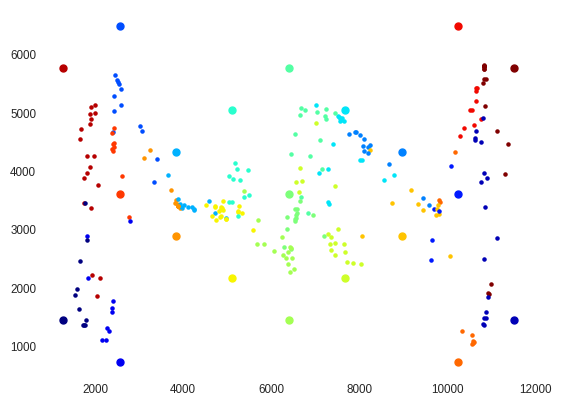

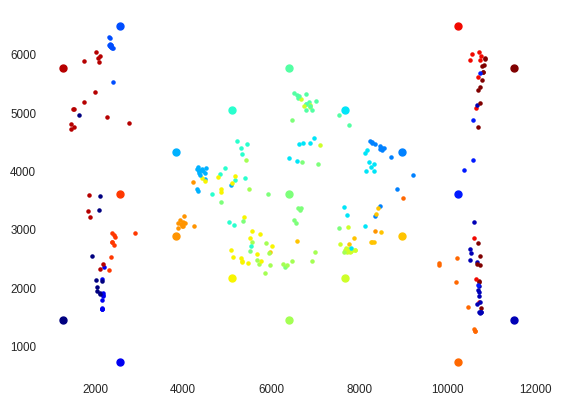

In [33]:
for dd in range(57):
    original_data = pd.read_csv("../participant_wise_test_data/participant_{}_test_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        list_data = ast.literal_eval(original_data.iloc[i,0])
        temp.append(list_data)
        temp.append(ast.literal_eval(original_data.iloc[i,1]))
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,0]
    y = df.iloc[:,1]
    # print(X.head())
    loaded_scaled_model = load('../participant_wise_models/scaled_models/participant_{}_model.joblib'.format(dd))
    # plt.style.use("seaborn-white")
    # fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 6))

    unknown_test_list = []
    for j in range(len(X)):
        temp = []
        for l in X[j]:
            temp.append(l)
        unknown_test_list.append(temp)
    y_pred = loaded_scaled_model.predict(unknown_test_list)


    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'])

    target_colors = plt.cm.jet(np.linspace(0, 1, 21))

    target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
    color_list = {str([1,2]): target_colors[0],str([1,8]): target_colors[19],str([2,1]): target_colors[2],str([2,5]):target_colors[17],str([2,9]):target_colors[4],str([3,4]):target_colors[15],str([3,6]):target_colors[6],str([4,3]):target_colors[13],str([4,7]):target_colors[8],str([5,2]):target_colors[11],str([5,5]):target_colors[10],str([5,8]):target_colors[9],str([6,3]):target_colors[12],str([6,7]):target_colors[7],str([7,4]):target_colors[14],str([7,6]):target_colors[5],str([8,1]):target_colors[16],str([8,5]):target_colors[3],str([8,9]):target_colors[18],str([9,2]):target_colors[1],str([9,8]):target_colors[20]}

    image = cv2.imread('../../new_data_training/points.jpg')
    image_height, image_width, _ = image.shape
    # scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

    # scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    scaled_target_points_color = [color_list[str(i)] for i in y]

    counter = 0
    for point in y_pred:
        plt.scatter(point[0], point[1], color=scaled_target_points_color[counter], s=5, marker='o')  # Adjust marker size and color as needed
        counter += 1

    for point in target:
        plt.scatter(int(point[0] * image_width), int(point[1] * image_height), color=color_list[str(point)], s=25, marker='o')  # Adjust marker size and color as needed


    # Show the plot
    plt.show()
